# **Walmart Business Case**

**Workflow**

!. Identify business questions

2. Collect and store data

3. Clean and prepare data

4. Analyze data

5. Visualize and communicate data

About Walmart

Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.

# 1. Business Questions:
*  **Customer purchase behavior** (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions.
*  **Understand if the spending habits differ between male and female customers**: Do women spend more on Black Friday than men?

In [1]:
import pandas as pd #pandas for data manipulation and analysis
import numpy as np # numpy for numerical calculations
import matplotlib.pyplot as plt #matplotlib for data visualization
import seaborn as sns #seaborn for enhanced data visualization
from scipy.stats import norm #scipy.stats for statistical functions and probablity distributions
from scipy.stats import binom

In [2]:
customers = pd.read_csv('/content/walmart_data.csv')
customers.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


Datatypes of all the fields in customers table

In [3]:
customers.dtypes

,0
User_ID,int64
Product_ID,object
Gender,object
Age,object
Occupation,int64
City_Category,object
Stay_In_Current_City_Years,object
Marital_Status,int64
Product_Category,int64
Purchase,int64


Descriptive Statistics

In [4]:
customers.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [ ]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


# Checking for Null values, duplicates and unique values

In [ ]:
customers.isnull().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category,0
Purchase,0


In [ ]:
customers.duplicated().sum()
#np.any(customers.duplicated())

0

In [3]:
customers.shape

(550068, 10)

Number of unique values in each column

In [ ]:
customers.nunique().sort_values(ascending = False)

,0
Purchase,18105
User_ID,5891
Product_ID,3631
Occupation,21
Product_Category,20
Age,7
Stay_In_Current_City_Years,5
City_Category,3
Gender,2
Marital_Status,2


In [30]:
m_unique = customers[customers['Gender'] == 'M'].nunique()
f_unique = customers[customers['Gender'] == 'F'].nunique()
print("Number of distinct male customers : ", m_unique, "\n"
      "Number of distinct female customers : ", f_unique)

Number of distinct male customers :  User_ID                        4225
Product_ID                     3588
Gender                            1
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      17547
dtype: int64 
Number of distinct female customers :  User_ID                        1666
Product_ID                     3367
Gender                            1
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      14704
dtype: int64


The dataset has 4225 distinct male users and 1666 distinct female users , a total of 5891 distinct users out of 550068 transactions.

The dataset can be a sample of the entire walmart transactions as such a huge MNC cannot just rely on the analysis of this small number of users

# Insights

There are 550068 customers in the dataset with 10 attributes

There are no duplicate values and no null values in the dataset

# Memory Optimization

In [ ]:
customers.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

Columns UserID, Gender, Age, Occupation, City_Category, Stay_In_Current_City_Years, Marital_Status, Gender have **categorical values**. The datatypes of these columns needs to be changed.

In [ ]:
# customers['Stay_In_Current_City_Years'] = customers['Stay_In_Current_City_Years'].replace('4+', 4)

In [16]:
customers['User_ID'] = customers['User_ID'].astype(np.int32)
customers['Gender'] = customers['Gender'].astype('category')
customers['Age'] = customers['Age'].astype('category')
customers['Occupation'] = customers['Occupation'].astype('category')
customers['City_Category'] = customers['City_Category'].astype('category')
customers['Stay_In_Current_City_Years'] = customers['Stay_In_Current_City_Years'].astype('category')
customers['Marital_Status'] = customers['Marital_Status'].apply(lambda x: 'Unmarried' if x == 0 else 'Married')
customers['Marital_Status'] = customers['Marital_Status'].astype('category')
customers['Product_Category'] = customers['Product_Category'].astype('int8')

In [17]:
cat_cols = ['User_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
            'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category']
customers[cat_cols] = customers[cat_cols].astype('category')
# customers.dtypes
customers.dtypes.reset_index()

,index,0
0,User_ID,category
1,Product_ID,object
2,Gender,category
3,Age,category
4,Occupation,category
5,City_Category,category
6,Stay_In_Current_City_Years,category
7,Marital_Status,category
8,Product_Category,category
9,Purchase,int64


The distribution of the data is not a normal distribution.
Using CLT, the data can be made to follow the properties of normal dsitribution to make critical business decisions

In [ ]:
customers['Marital_Status'] = customers['Marital_Status'].apply(lambda x: 'Unmarried' if x == 0 else 'Married')

In [ ]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  category
 1   Product_ID                  550068 non-null  object  
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  category
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  category
 9   Purchase                    550068 non-null  int64   
dtypes: category(8), int64(1), object(1)
memory usage: 13.3+ MB


# Insights:

After changing the datatypes of the categorical columns to categories, the memory has been optimized from 42.0MB to 13.2MB

In [ ]:
customers.describe().T

,count,mean,std,min,25%,50%,75%,max
Purchase,550068.0,9263.968713,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


In [ ]:
customers.describe(include = 'category').T

,count,unique,top,freq
User_ID,550068,5891,1001680,1026
Gender,550068,2,M,414259
Age,550068,7,26-35,219587
Occupation,550068,21,4,72308
City_Category,550068,3,B,231173
Stay_In_Current_City_Years,550068,5,1,193821
Marital_Status,550068,2,0,324731
Product_Category,550068,20,5,150933


# Insights

1. There are 5891 unique customers out of which 1001680 is the most frequent user who bought highest number of products of ablout 1026.

2. Out of 550068 walmart customers, 414259 are male customers

3. There are 7 distinct age groups, while the top customers are from 26-35 yrs age group

4. Customers belonging to 4th Occupation bought most of the products compared to other occupational categories

5. Out of the three City categories, walmart has most of the customers of about 231173 from B city category

6. People who have newly moved to the city implying that their current stay in the city is less than 1 are the top customers making the purchase at walmart

7. Unmarried customers are in the greater percentage of buying the products than married people

8. 5th product category has a tremendous purchases of about 150933

9. Maximum purchase made by a customer is 23,961

# Value counts of the categorical attributes in the data

In [ ]:
categorical_cols = ['Age', 'Gender', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category']

In [ ]:
categorical_val_counts = customers[categorical_cols].melt().groupby(['variable','value'])['value'].count()

In [ ]:
categorical_val_counts*100/len(customers)

variable                    value    
Age                         0-17          2.745479
                            18-25        18.117760
                            26-35        39.919974
                            36-45        19.999891
                            46-50         8.308246
                            51-55         6.999316
                            55+           3.909335
City_Category               A            26.854862
                            B            42.026259
                            C            31.118880
Gender                      F            24.689493
                            M            75.310507
Marital_Status              Married      40.965299
                            Unmarried    59.034701
Occupation                  0            12.659889
                            1             8.621843
                            2             4.833584
                            3             3.208694
                            4            13.145284
                            5             2.213726
                            6             3.700452
                            7            10.750125
                            8             0.281056
                            9             1.143677
                            10            2.350618
                            11            2.106285
                            12            5.668208
                            13            1.404917
                            14            4.964659
                            15            2.211545
                            16            4.612339
                            17            7.279645
                            18            1.203851
                            19            1.538173
                            20            6.101427
Product_Category            1            25.520118
                            2             4.338373
                            3             3.674637
                            4             2.136645
                            5            27.438971
                            6             3.720631
                            7             0.676462
                            8            20.711076
                            9             0.074536
                            10            0.931703
                            11            4.415272
                            12            0.717548
                            13            1.008784
                            14            0.276875
                            15            1.143495
                            16            1.786688
                            17            0.105078
                            18            0.568112
                            19            0.291419
                            20            0.463579
Stay_In_Current_City_Years  0            13.525237
                            1            35.235825
                            2            18.513711
                            3            17.322404
                            4+           15.402823
Name: value, dtype: float64

# Outliers for each continuous variable in the dataset

In [ ]:
cont_cols = ['Purchase']

<Axes: >

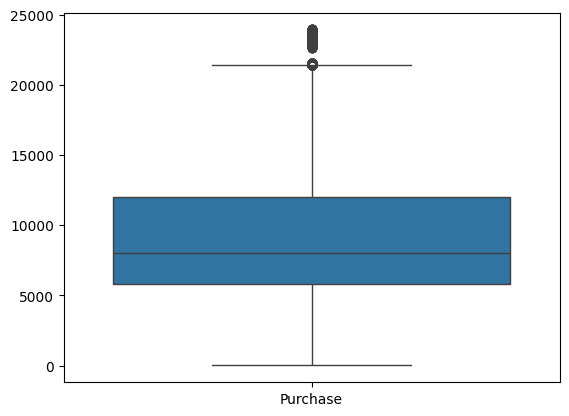

In [ ]:
sns.boxplot(data=customers[cont_cols])

In [ ]:
per_25 = np.percentile(customers['Purchase'], 25)
per_75 = np.percentile(customers['Purchase'], 75)
iqr = per_75 - per_25
lower_bound = per_25 - (1.5 * iqr)
upper_bound = per_75 + (1.5 * iqr)

In [ ]:
lower_bound, upper_bound

(-3523.5, 21400.5)

In [ ]:
purchase_outliers = customers[(customers['Purchase'] < lower_bound) | (customers['Purchase'] > upper_bound)]
purchase_outliers

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
343,1000058,P00117642,M,26-35,2,B,3,0,10,23603
375,1000062,P00119342,F,36-45,3,A,1,0,10,23792
652,1000126,P00087042,M,18-25,9,B,1,0,10,23233
736,1000139,P00159542,F,26-35,20,C,2,0,10,23595
1041,1000175,P00052842,F,26-35,2,B,1,0,10,23341
...,...,...,...,...,...,...,...,...,...,...
544488,1005815,P00116142,M,26-35,20,B,1,0,10,23753
544704,1005847,P00085342,F,18-25,4,B,2,0,10,23724
544743,1005852,P00202242,F,26-35,1,A,0,1,10,23529
545663,1006002,P00116142,M,51-55,0,C,1,1,10,23663


In [ ]:
filtered_data = customers[(customers['Purchase']>lower_bound) & (customers['Purchase']<upper_bound)]
filtered_data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [ ]:
no_of_purchase_outliers = (len(purchase_outliers)/len(customers))*100
no_of_purchase_outliers

0.4866671029763593

# Insights

All the data that has purchase value greater than 21400 are considered outliers.

0.48% of the data has outliers in purchase column

# Clipping the data

In [ ]:
clipped_purchase = np.clip(customers['Purchase'], lower_bound, upper_bound)
clipped_purchase

,Purchase
0,8370.0
1,15200.0
2,1422.0
3,1057.0
4,7969.0
...,...
550063,368.0
550064,371.0
550065,137.0
550066,365.0


# Univariate Analysis

# Gender Column

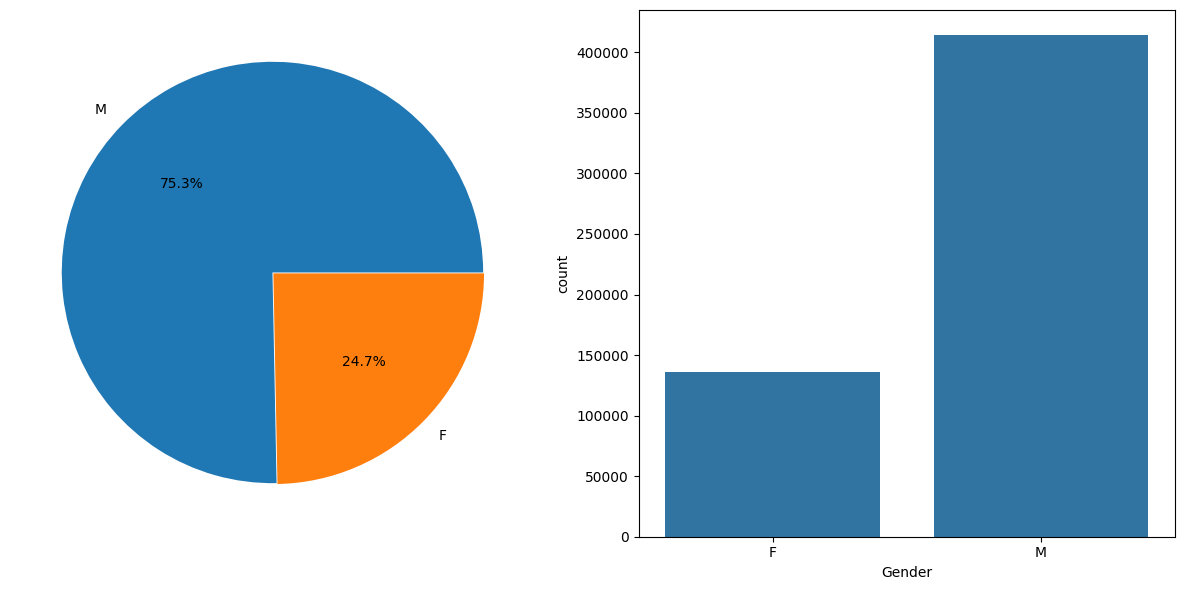

In [ ]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
gender_counts = customers['Gender'].value_counts()
plt.pie(gender_counts, labels = gender_counts.index, autopct = '%0.1f%%', explode = (0.006,0))

plt.subplot(1,2,2)
sns.countplot(data = customers, x = 'Gender')
plt.tight_layout()
plt.show()

In [ ]:
gender_counts.reset_index()

,Gender,count
0,M,414259
1,F,135809


# Insights:

1. 75.3% of the customers are male while 24.7% are female.
2. Out of 0.54M entries, 0.4M are male customers and 0.13M are female customers
3. Out of 0.13M female customers, only 1666 are distinct customers who made different purchases
4. Out of 0.4M male customers, only 4225 are distinct customers who made different purchases

# Age Column

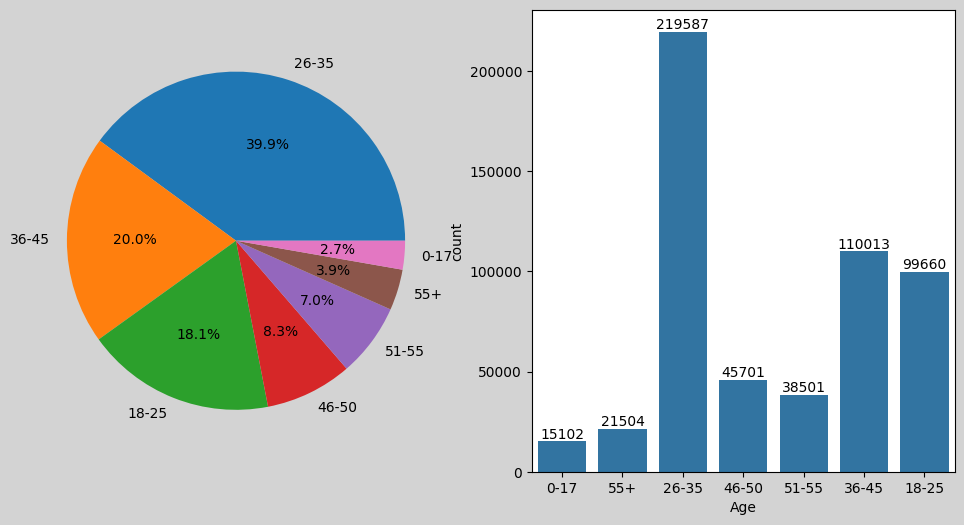

In [15]:
plt.figure(figsize = (12,6)).set_facecolor('lightgrey')
plt.subplot(1,2,1)
age_counts = customers['Age'].value_counts()
# plt.pie(df.groupby('Age')['Age'].count(), labels = labels, explode =
# (0.08,0,0,0,0,0,0), autopct = '%0.0f%%')

plt.pie(age_counts, labels = age_counts.index, autopct = '%0.1f%%')

plt.subplot(1,2,2)
label = sns.countplot(data = customers, x='Age')
for i in label.containers:
 label.bar_label(i)
# plt.subplot(1,2,2)
# sns.countplot(data = customers, x = 'Age')
# plt.tight_layout()
plt.show()

In [ ]:
age_counts

,count
Age,
26-35,219587
36-45,110013
18-25,99660
46-50,45701
51-55,38501
55+,21504
0-17,15102


# Insights:
1. 40% of the customers are from 26-35yr age group

2. 20% of the customers are from 36-45yr age group

3. 18% of the customers belong to 18-25yr age group

4. 0-17yr and 55+ age groups are the **least frequent buyers** with 15k adn 21k records while 36-45yr and 26-35yr age groups are the** most frequent buyers** with 0.1M and 0.21M records respectively

5. 18-45 age group contribute to the **majority of purchases** from walmart

# Occupation Column

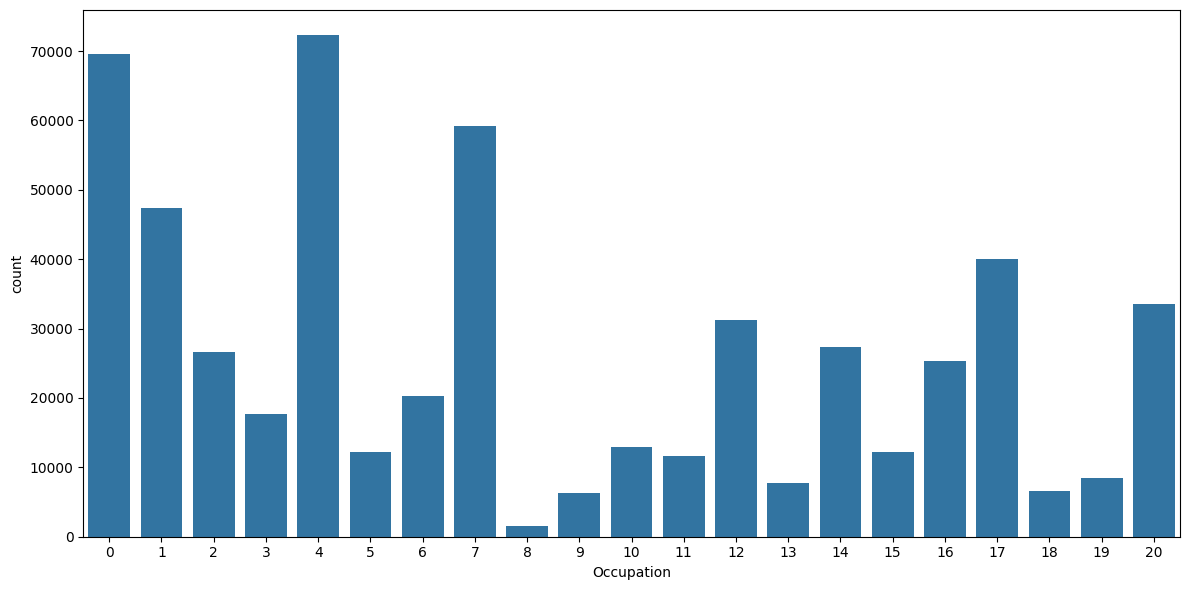

In [ ]:
plt.figure(figsize = (12,6))
# plt.subplot(1,2,1)
# occupation_counts = customers['Occupation'].value_counts()
# plt.pie(occupation_counts, labels = occupation_counts.index, autopct = '%0.1f%%')

# plt.subplot(1,2,2)
sns.countplot(data = customers, x = 'Occupation')
plt.tight_layout()
plt.show()

# Insights:
1. People with occupation level 4 are the most frequent buyers followed by occupation 0 and 7
People with occupation level 8 are the least frequent buyers followed by 9 and 18

In [ ]:
np.round(customers['Occupation'].value_counts(normalize = True)*100,2).cumsum()

,proportion
Occupation,
4,13.15
0,25.81
7,36.56
1,45.18
17,52.46
20,58.56
12,64.23
14,69.19
2,74.02


# Insights:
82.33% of the total transactions were made by customers belonging to 4, 0, 7, 1, 12, 20, 12, 14, 2, 16, 6 occupation levels respectively

# City Category Column

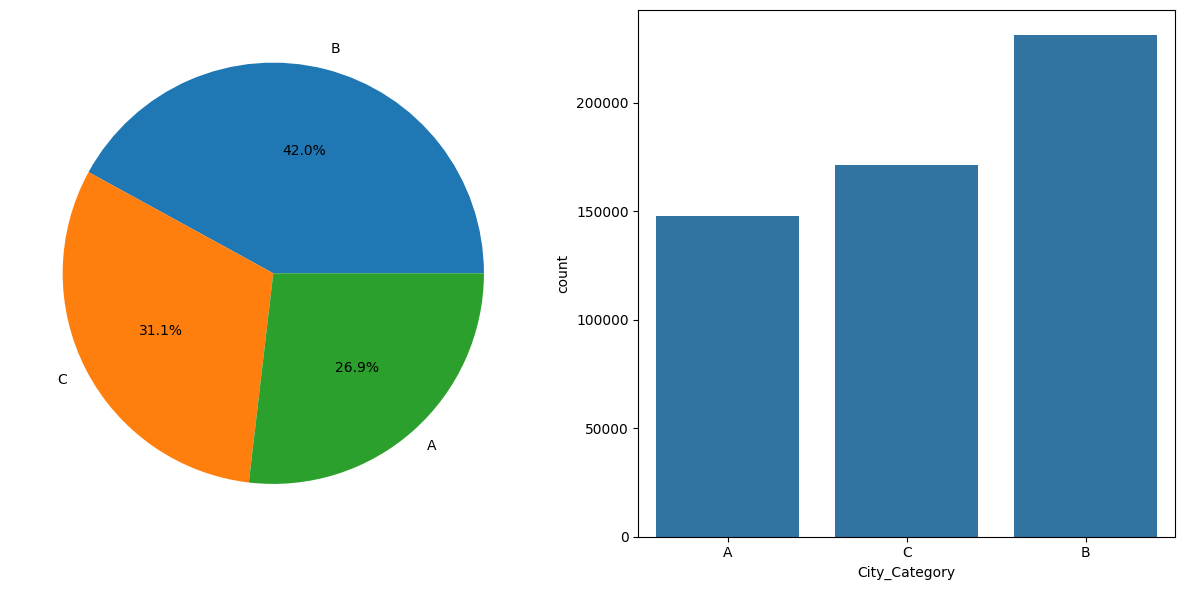

In [17]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
citycategory_counts = customers['City_Category'].value_counts()
plt.pie(citycategory_counts, labels = citycategory_counts.index, autopct = '%0.1f%%')

plt.subplot(1,2,2)
sns.countplot(data = customers, x = 'City_Category')
plt.tight_layout()
plt.show()

In [19]:
citycategory_counts.sort_index()

,count
City_Category,
A,147720
B,231173
C,171175


# Insights:

1. 42% of the buyers are from city B with 0.23M records, 31% are form city C and 26.9% are from city A

# Marital Status Column

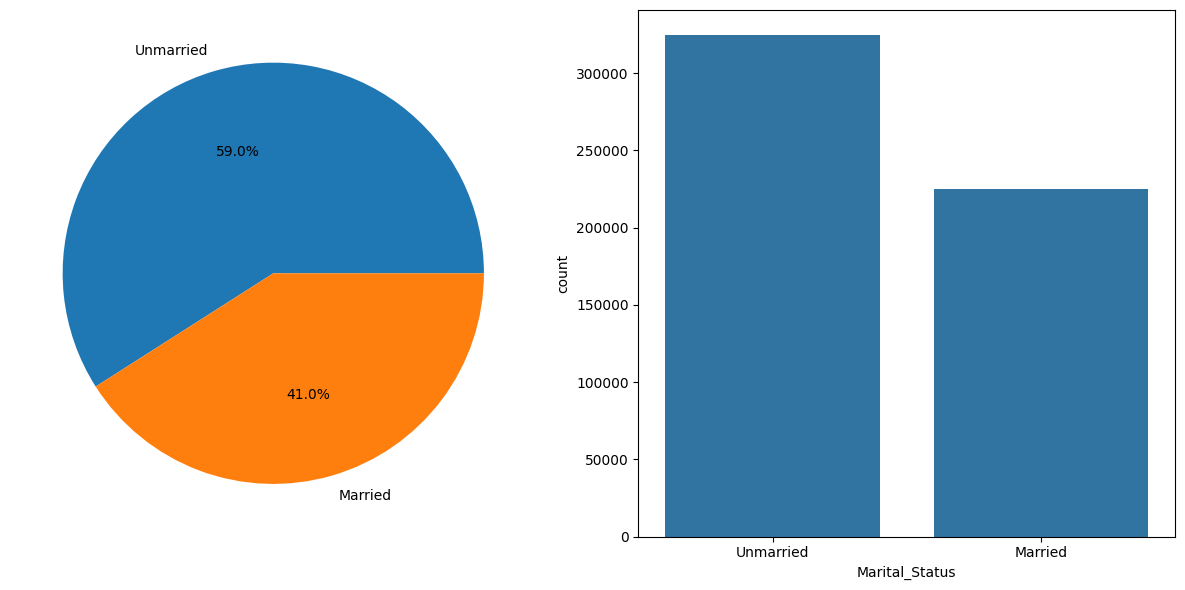

In [ ]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
marital_status_counts = customers['Marital_Status'].value_counts()
plt.pie(marital_status_counts, labels = marital_status_counts.index, autopct = '%0.1f%%')

plt.subplot(1,2,2)
sns.countplot(data = customers, x = 'Marital_Status')
plt.tight_layout()
plt.show()

In [ ]:
marital_status_counts

,count
Marital_Status,
Unmarried,324731
Married,225337


# Insights:
1.  0.32M customers are unmarried accounting to 59% of the records in the dataset
2. 41% of the data that is 0.22M records are of married customers

# Product Category Column

In [ ]:
np.round(customers['Product_Category'].value_counts(normalize = True)*100,2).cumsum()

,proportion
Product_Category,
5,27.44
1,52.96
8,73.67
11,78.09
2,82.43
6,86.15
3,89.82
4,91.96
16,93.75


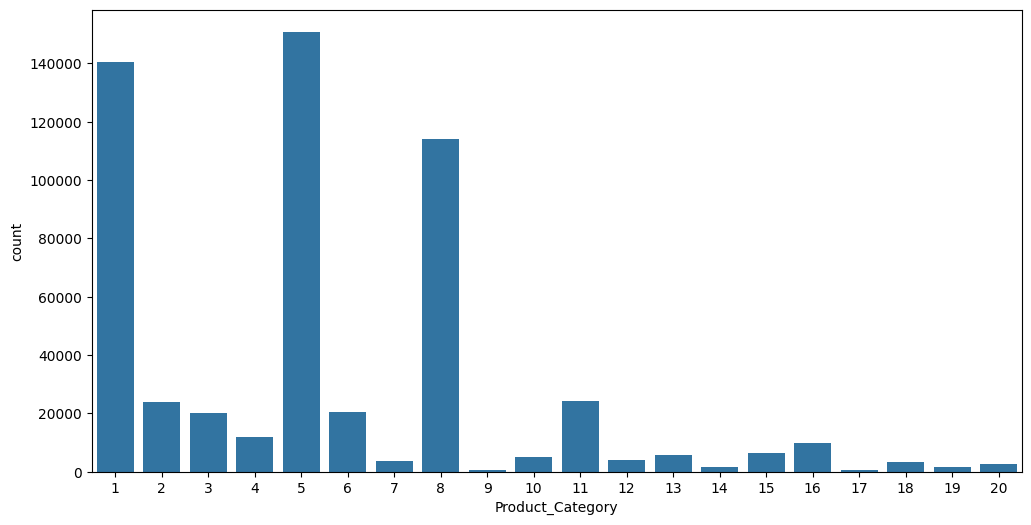

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data = customers, x = 'Product_Category')
plt.show()

# Insights:
1. The most frequently bought product category is 5 followed by 1 and 8
2. The other categories are not much touched

# Stay In Current City Column

In [ ]:
np.round(customers['Stay_In_Current_City_Years'].value_counts(normalize = True)*100, 2)

,proportion
Stay_In_Current_City_Years,
1,35.24
2,18.51
3,17.32
4+,15.40
0,13.53


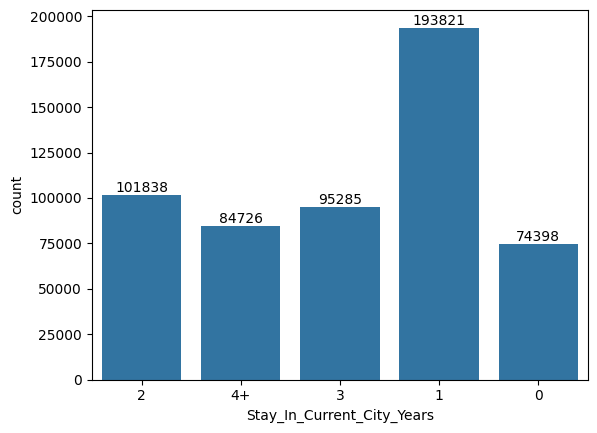

In [22]:
label = sns.countplot(data = customers, x='Stay_In_Current_City_Years')
for i in label.containers:
 label.bar_label(i)

52.75% of the transactions are made by customers staying the city for 1 to 2 yrs

# Purchase Column
**Numercial data**

In [ ]:
round(customers['Purchase'].describe(),2)

,Purchase
count,550068.00
mean,9263.97
std,5023.07
min,12.00
25%,5823.00
50%,8047.00
75%,12054.00
max,23961.00


# Insights:
1. The average order value is 9263.97
2. Maximum purchase made by a customer is 23961
3. 50% of the customers spend an approximate amount of 8047
4. The minimum purchase made by a customer is 12

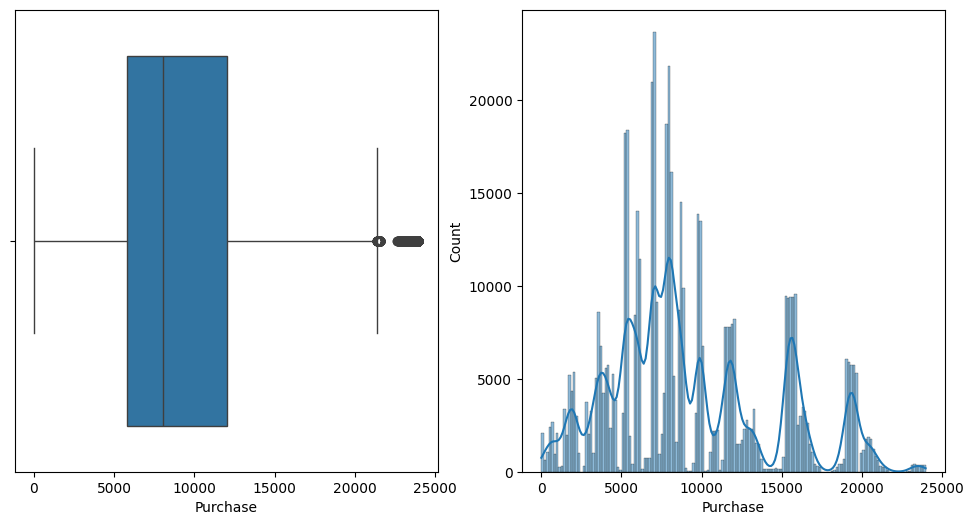

In [ ]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.boxplot(data = customers, x = 'Purchase')
plt.subplot(1,2,2)
sns.histplot(data = customers, x = 'Purchase',kde = 'True')
plt.show()

# Insights:

1. Most of the purchases are between 6000 and 12000
2. Most of the purchase orders lie between 5k and 10k


# Bivariant Analysis

Categorical vs Numerical Data

Analyzing the variation in purchases with the following,

1. Gender vs Purchase
2. Martial_Status vs Purchase
3. Age vs Purchase
4. City_Category vs Purchase

**Purchase vs Gender**

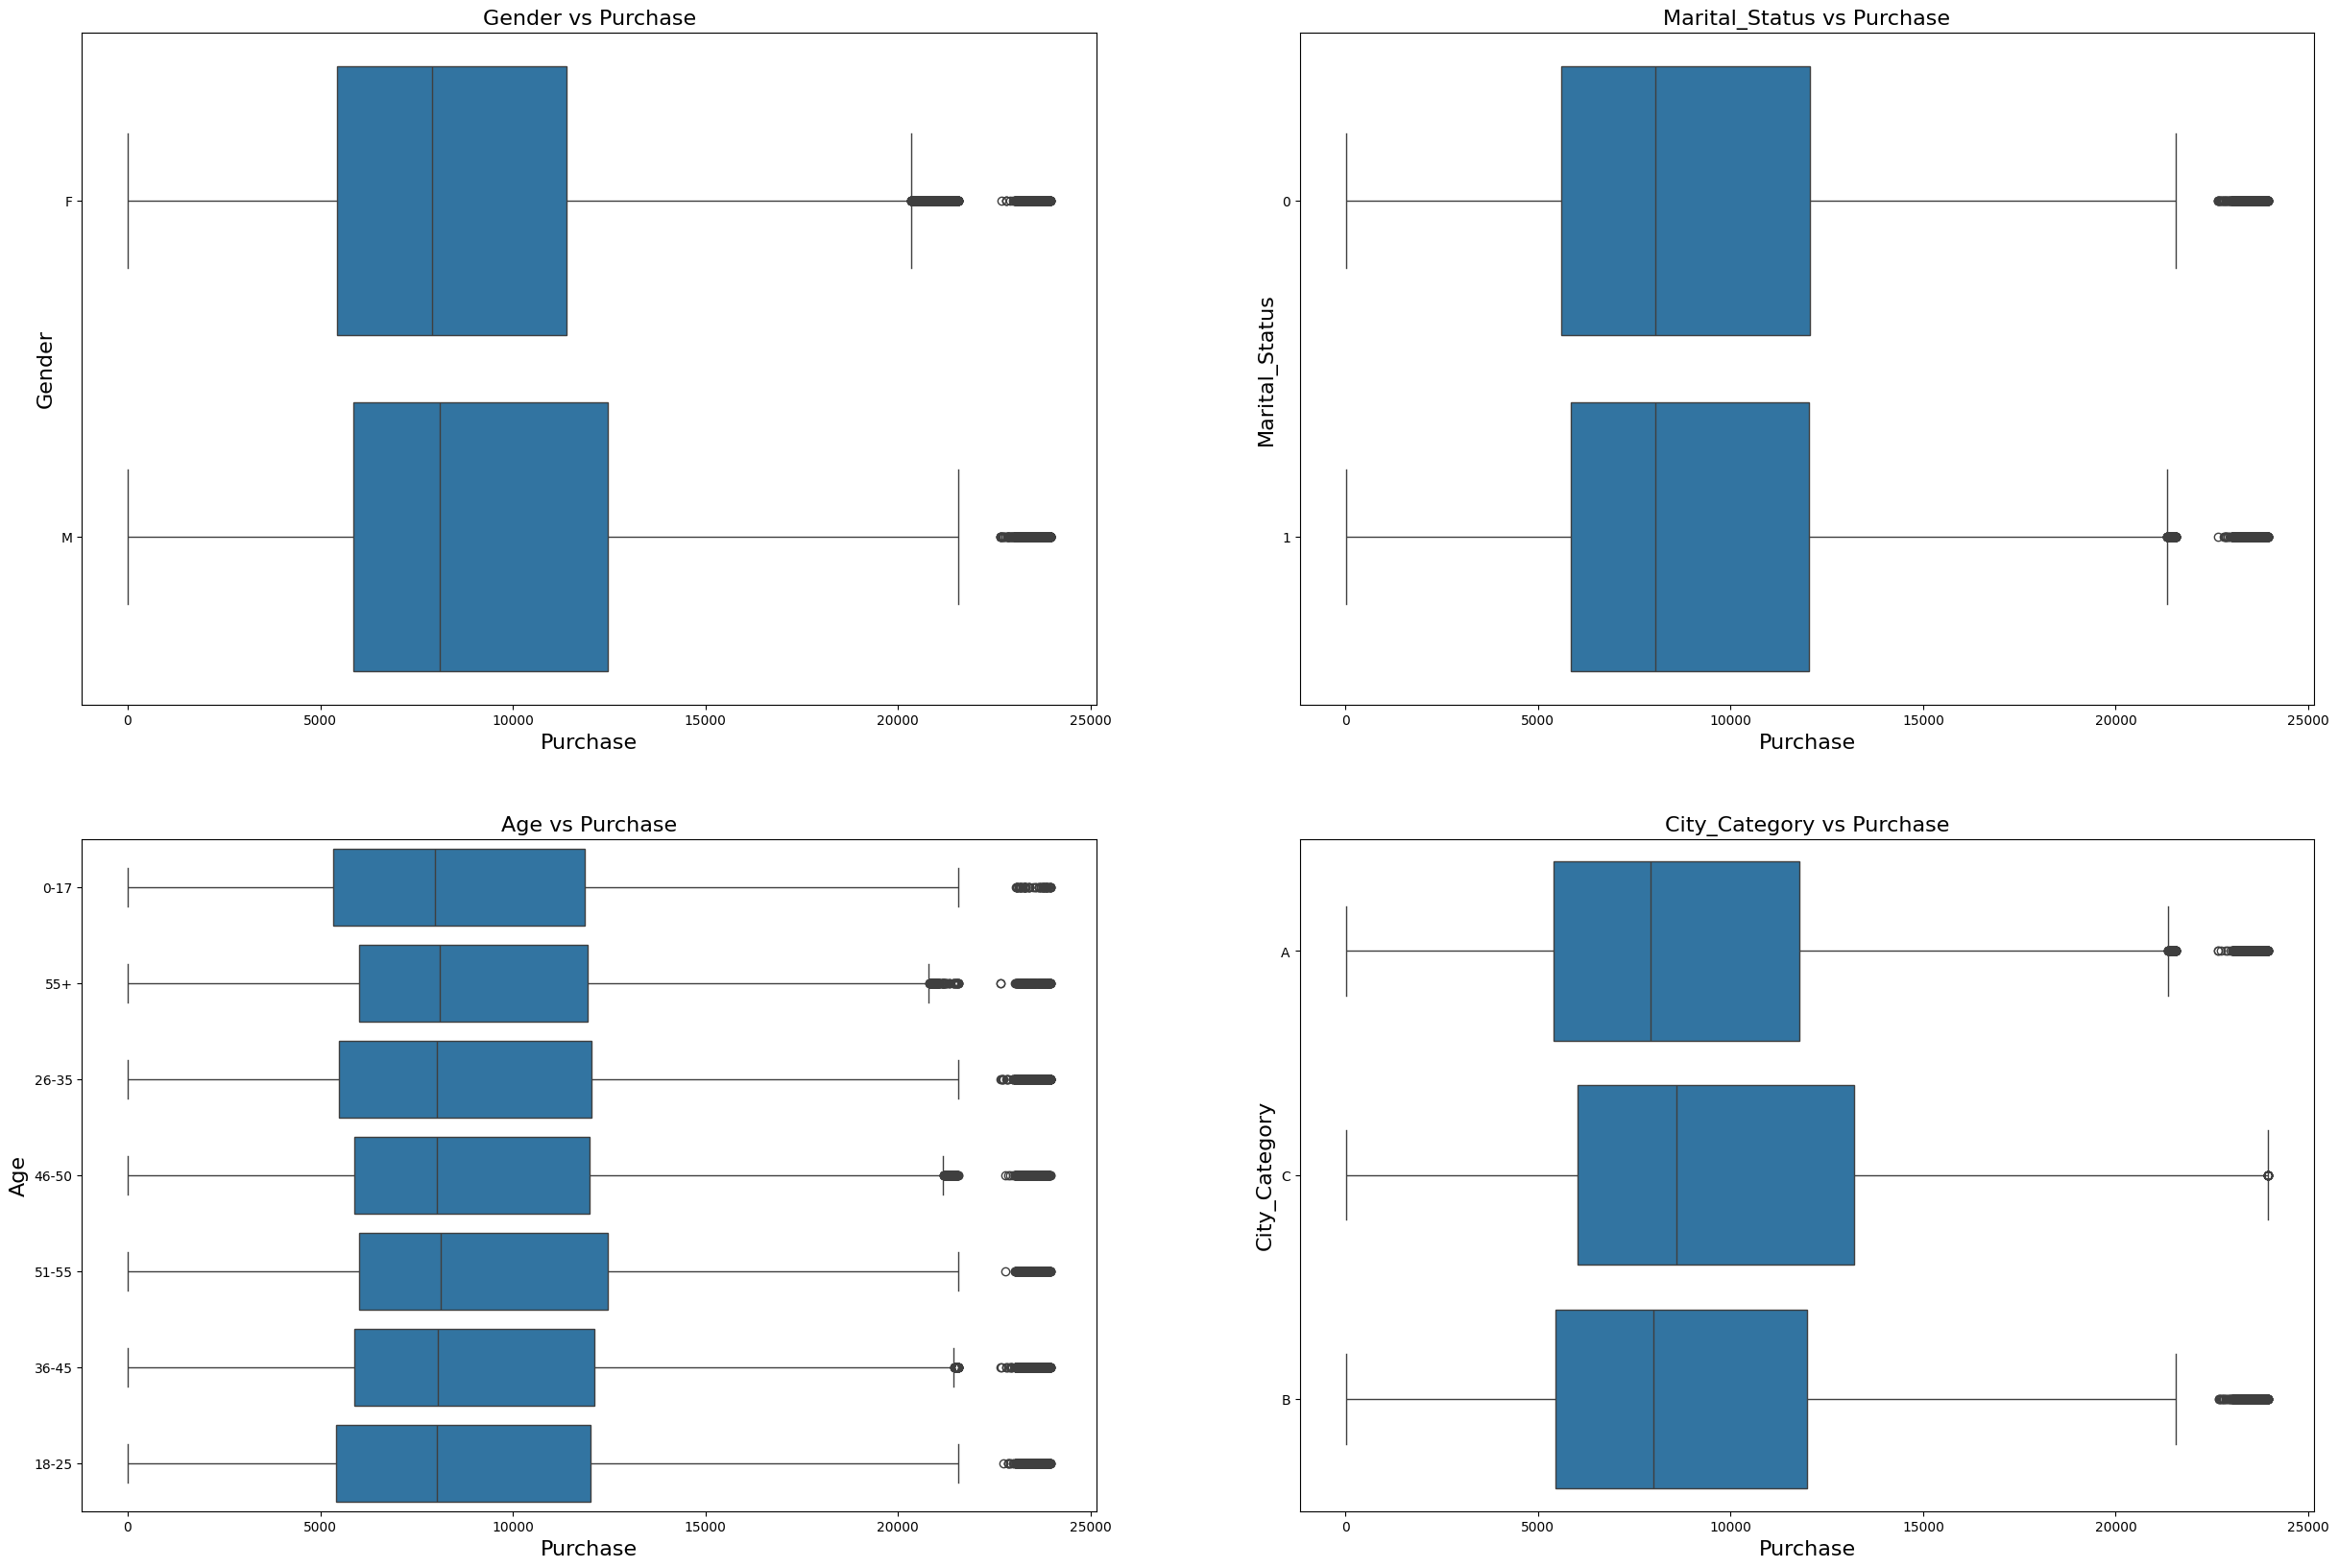

In [22]:
fig1, axs=plt.subplots(nrows=2,ncols=2, figsize=(30,20))

sns.boxplot(data=customers, y='Gender',x ='Purchase',orient='h',ax=axs[0,0])
axs[0,0].set_title("Gender vs Purchase", fontsize=16)
axs[0,0].set_xlabel("Purchase", fontsize=16)
axs[0,0].set_ylabel("Gender", fontsize=16)

sns.boxplot(data=customers, y='Marital_Status',x ='Purchase',orient='h',ax=axs[0,1])
axs[0,1].set_title("Marital_Status vs Purchase", fontsize=16)
axs[0,1].set_xlabel("Purchase", fontsize=16)
axs[0,1].set_ylabel("Marital_Status", fontsize=16)

sns.boxplot(data=customers, y='Age',x ='Purchase',orient='h',ax=axs[1,0])
axs[1,0].set_title("Age vs Purchase", fontsize=16)
axs[1,0].set_xlabel("Purchase", fontsize=16)
axs[1,0].set_ylabel("Age", fontsize=16)

sns.boxplot(data=customers, y='City_Category',x ='Purchase',orient='h',ax=axs[1,1])
axs[1,1].set_title("City_Category vs Purchase", fontsize=16)
axs[1,1].set_xlabel("Purchase", fontsize=16)
axs[1,1].set_ylabel("City_Category", fontsize=16)
plt.show()

In [24]:
customers.groupby(['Gender'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,135809.0,8734.565765,4767.233289,12.0,5433.0,7914.0,11400.0,23959.0
M,414259.0,9437.526040,5092.186210,12.0,5863.0,8098.0,12454.0,23961.0


The average order value of male customers is 9437.5 while the average value of female customers is 8734

50% of the male customers spent an approx amount of 8098 while 50% of female customers made a purchase amount of 7914



In [23]:
round(customers.groupby(by = ['Age'])['Purchase'].describe(),2)

,count,mean,std,min,25%,50%,75%,max
Age,,,,,,,,
0-17,15102.0,8933.46,5111.11,12.0,5328.0,7986.0,11874.0,23955.0
18-25,99660.0,9169.66,5034.32,12.0,5415.0,8027.0,12028.0,23958.0
26-35,219587.0,9252.69,5010.53,12.0,5475.0,8030.0,12047.0,23961.0
36-45,110013.0,9331.35,5022.92,12.0,5876.0,8061.0,12107.0,23960.0
46-50,45701.0,9208.63,4967.22,12.0,5888.0,8036.0,11997.0,23960.0
51-55,38501.0,9534.81,5087.37,12.0,6017.0,8130.0,12462.0,23960.0
55+,21504.0,9336.28,5011.49,12.0,6018.0,8105.5,11932.0,23960.0


# Insights:
1. The highest average purchase order is made by 51-55 age group which is 95384
2. The maximum purchase made by the customers is 23960 while the minimum is 12
3. The highest number of purchases is made by 26-35

4. The highest order value of all the age groups is 23960

In [25]:
round(customers.groupby(by = ['City_Category'])['Purchase'].describe(),2)

,count,mean,std,min,25%,50%,75%,max
City_Category,,,,,,,,
A,147720.0,8911.94,4892.12,12.0,5403.0,7931.0,11786.0,23961.0
B,231173.0,9151.30,4955.50,12.0,5460.0,8005.0,11986.0,23960.0
C,171175.0,9719.92,5189.47,12.0,6031.5,8585.0,13197.0,23961.0


The average order value of city C is high 9719 compared to cities A & B



Purchase patterns in Occupation Category

<ipython-input-27-00e0582f946c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = customers, y ='Purchase', x = 'Occupation', palette =


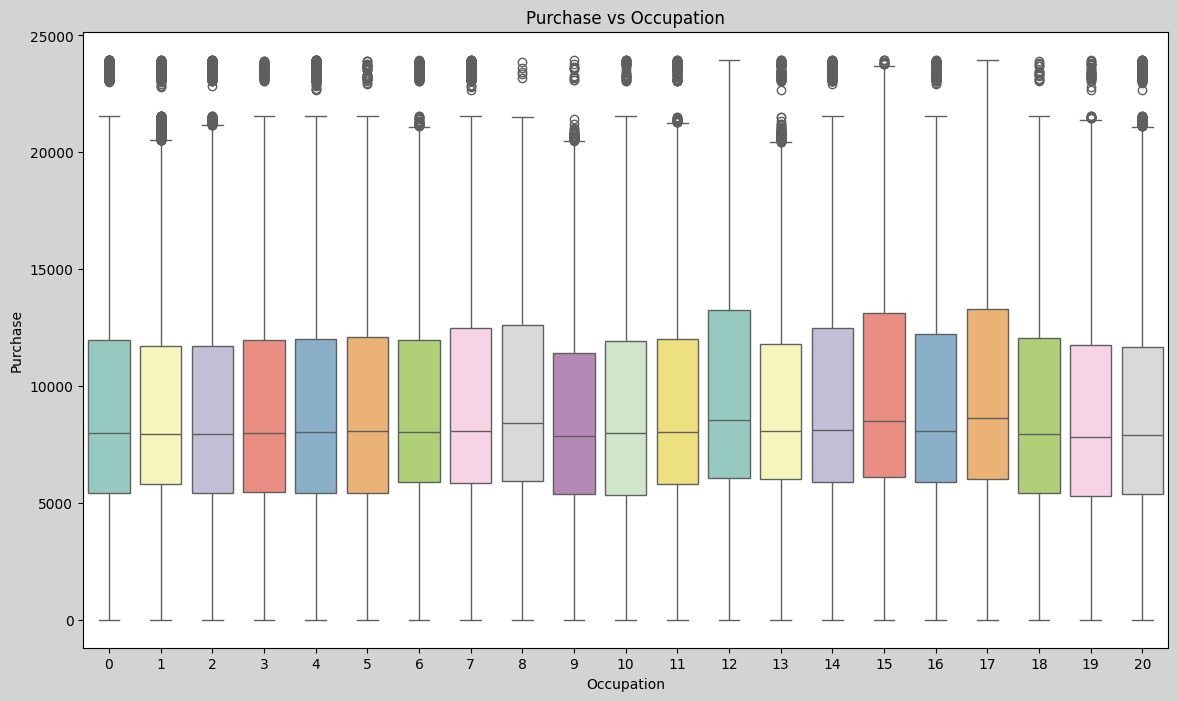

In [27]:
plt.figure(figsize = (14,8)).set_facecolor("lightgrey")
sns.boxplot(data = customers, y ='Purchase', x = 'Occupation', palette =
'Set3')
plt.title('Purchase vs Occupation')
plt.show()

Occupation 17 has the highest order value while occupation 9 has the least order value

Occupation 17 has the highest median value giving insight into its overall tendency to have larger or higher values around the center of its data distribution

Hence Occupation 17 is less sensitive to outliers as median is not affected by extreme values

**Stay in a city vs Purchase habits**

<ipython-input-28-a7040d16de30>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = customers, y ='Purchase', x =


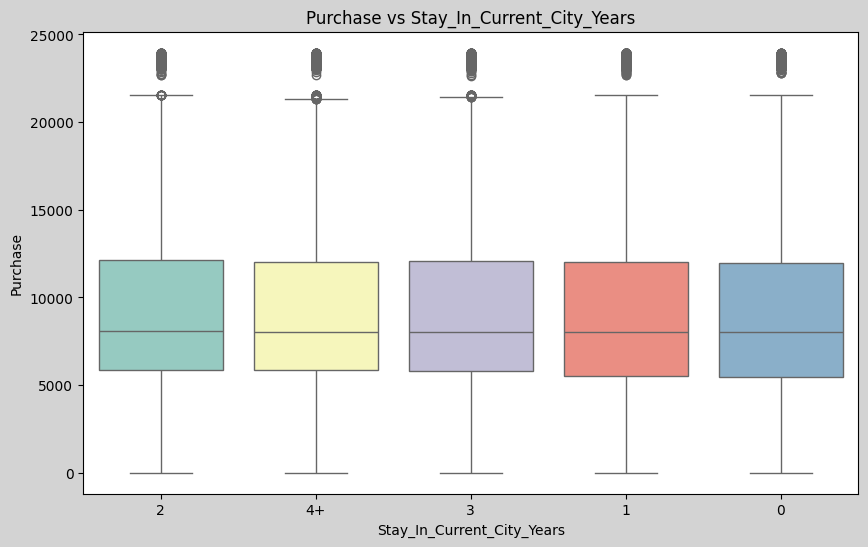

In [28]:
plt.figure(figsize = (10,6)).set_facecolor("lightgrey")
sns.boxplot(data = customers, y ='Purchase', x =
'Stay_In_Current_City_Years', palette = 'Set3')
plt.title('Purchase vs Stay_In_Current_City_Years')
plt.show()


In [34]:
customers.groupby(['Stay_In_Current_City_Years'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Stay_In_Current_City_Years,,,,,,,,
0,74398.0,9180.075123,4990.479940,12.0,5480.0,8025.0,11990.0,23960.0
1,193821.0,9250.145923,5027.476933,12.0,5500.0,8041.0,12042.0,23961.0
2,101838.0,9320.429810,5044.588224,12.0,5846.0,8072.0,12117.0,23961.0
3,95285.0,9286.904119,5020.343541,12.0,5832.0,8047.0,12075.0,23961.0
4+,84726.0,9275.598872,5017.627594,12.0,5844.0,8052.0,12038.0,23958.0


The median value is almost same for all years

**Key Interpretations of the Same Median for Different Categories:**

**Same Central Tendency:**

The middle value is identical.

This means that, on average, the "typical" value or midpoint in all these categories is the same.

**Different Distributions:**

Even though the categories share the same median, other characteristics of their distributions (like the range, variability, or shape) could be very different.

**Possible Differences in Mean and Spread:**

The mean (average) or the spread (variance) of the categories may differ significantly, even if the medians are the same.
A category with extreme values (outliers) could have the same median as another category with no outliers, because the median only depends on the middle value of the data and not the extremes.








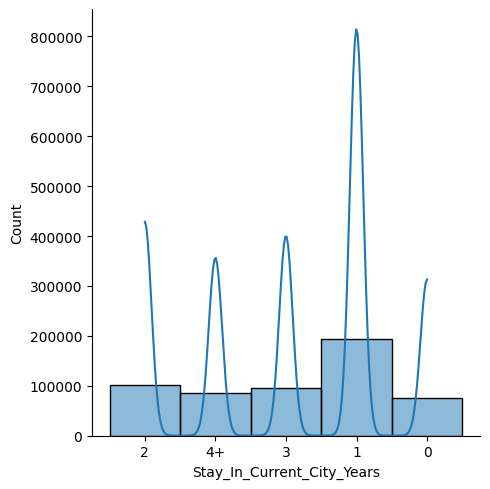

In [40]:
sns.displot(x = 'Stay_In_Current_City_Years', data = customers, kde = True)

**Purchase vs city category**

<ipython-input-30-d24b30820607>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = customers, y ='Purchase', x = 'City_Category', palette =


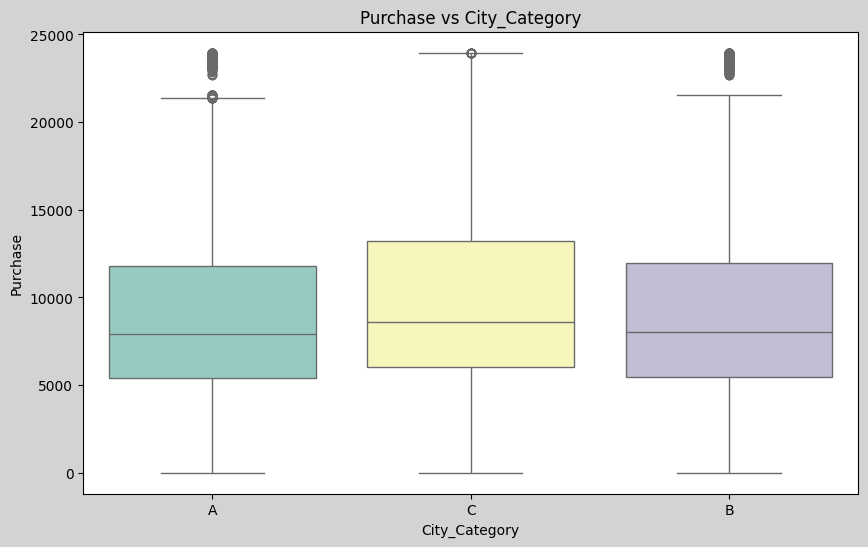

In [30]:
plt.figure(figsize = (10,6)).set_facecolor("lightgrey")
sns.boxplot(data = customers, y ='Purchase', x = 'City_Category', palette =
'Set3')
plt.title('Purchase vs City_Category')
plt.show()


In [32]:
customers.groupby(['City_Category'])['Purchase'].describe()


,count,mean,std,min,25%,50%,75%,max
City_Category,,,,,,,,
A,147720.0,8911.939216,4892.115238,12.0,5403.0,7931.0,11786.0,23961.0
B,231173.0,9151.300563,4955.496566,12.0,5460.0,8005.0,11986.0,23960.0
C,171175.0,9719.920993,5189.465121,12.0,6031.5,8585.0,13197.0,23961.0


We can observe that the mean value for a order is highest for city C followed by B
and A.


**Marital Status vs Purchase**

<ipython-input-42-29800dedcb53>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = customers, y ='Purchase', x = 'Marital_Status', palette =


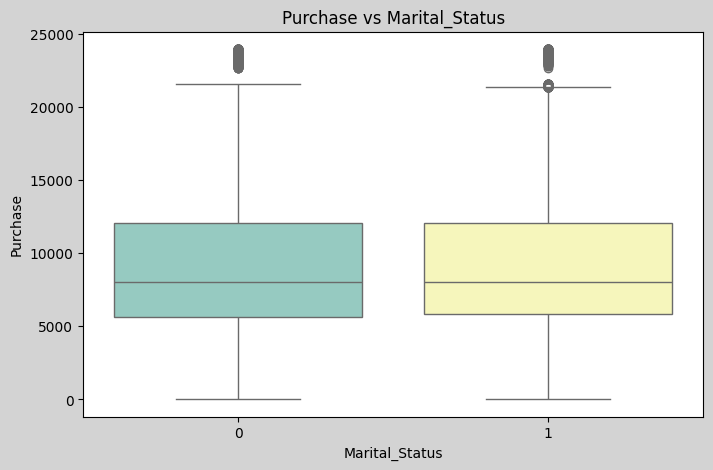

In [42]:
plt.figure(figsize = (8,5)).set_facecolor("lightgrey")
sns.boxplot(data = customers, y ='Purchase', x = 'Marital_Status', palette =
'Set3')
plt.title('Purchase vs Marital_Status')
plt.show()

In [44]:
customers.groupby(['Marital_Status'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Marital_Status,,,,,,,,
0,324731.0,9265.907619,5027.347859,12.0,5605.0,8044.0,12061.0,23961.0
1,225337.0,9261.174574,5016.897378,12.0,5843.0,8051.0,12042.0,23961.0


Married and unmarried customers have same min order values and maximum order values indicating that they lie within same range

They almost have same mean suggesting a stronger similarity between two groups and their average spending is same

However the distributions may not be identical(could be skewed or differ in variance)



In [55]:
# customers.groupby(['Marital_Status'])['Purchase'].std()

**Purchase vs Product Category**

<ipython-input-46-ea37216ef768>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = customers, x = 'Product_Category', y ='Purchase', palette


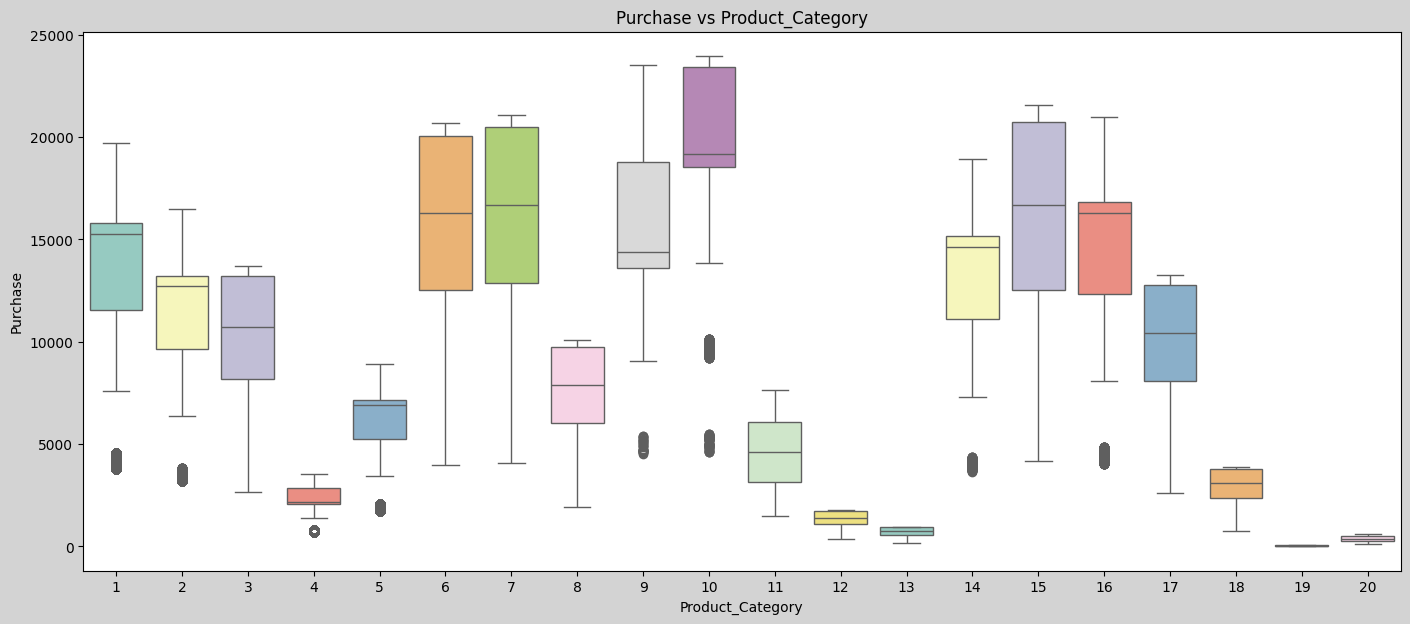

In [46]:
plt.figure(figsize = (17,7)).set_facecolor("lightgrey")
sns.boxplot(data = customers, x = 'Product_Category', y ='Purchase', palette
= 'Set3')
plt.title('Purchase vs Product_Category')
plt.show()


The distribution of data, medians are quite different for different product categories

In [48]:
customers.groupby(['Product_Category'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Product_Category,,,,,,,,
1,140378.0,13606.218596,4298.834894,3790.0,11546.00,15245.0,15812.00,19708.0
2,23864.0,11251.935384,3570.642713,3176.0,9645.75,12728.5,13212.00,16504.0
3,20213.0,10096.705734,2824.626957,2638.0,8198.00,10742.0,13211.00,13717.0
4,11753.0,2329.659491,812.540292,684.0,2058.00,2175.0,2837.00,3556.0
5,150933.0,6240.088178,1909.091687,1713.0,5242.00,6912.0,7156.00,8907.0
6,20466.0,15838.478550,4011.233690,3981.0,12505.00,16312.0,20051.00,20690.0
7,3721.0,16365.689600,4174.554105,4061.0,12848.00,16700.0,20486.00,21080.0
8,113925.0,7498.958078,2013.015062,1939.0,6036.00,7905.0,9722.00,10082.0
9,410.0,15537.375610,5330.847116,4528.0,13583.50,14388.5,18764.00,23531.0


• The median value for product category 10 is the highest which is 19197.

• The median value for product category 19 is the lowest which is only 37.

The average order value for category 10 is the highest which is 19675.

• The average order value for category 19 is also the lowest which is 37.

• Clearly, category 19 is the least preferred or least frequent bought product category.


Using quantile to detect outliers in purchase

In [27]:
q1 = customers["Purchase"].quantile(0.25)
q3 = customers["Purchase"].quantile(0.75)
IQR = q3-q1
outliers = customers["Purchase"][((customers["Purchase"]<(q1-1.5*IQR)) | (customers["Purchase"]>(q3+1.5*IQR)))]
print("number of outliers: "+ str(len(outliers)))
print("max outlier value:"+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))

number of outliers: 2677
max outlier value:23961
min outlier value: 21401


# Multivariate Analysis

**Male vs female purchase habits wrt age**

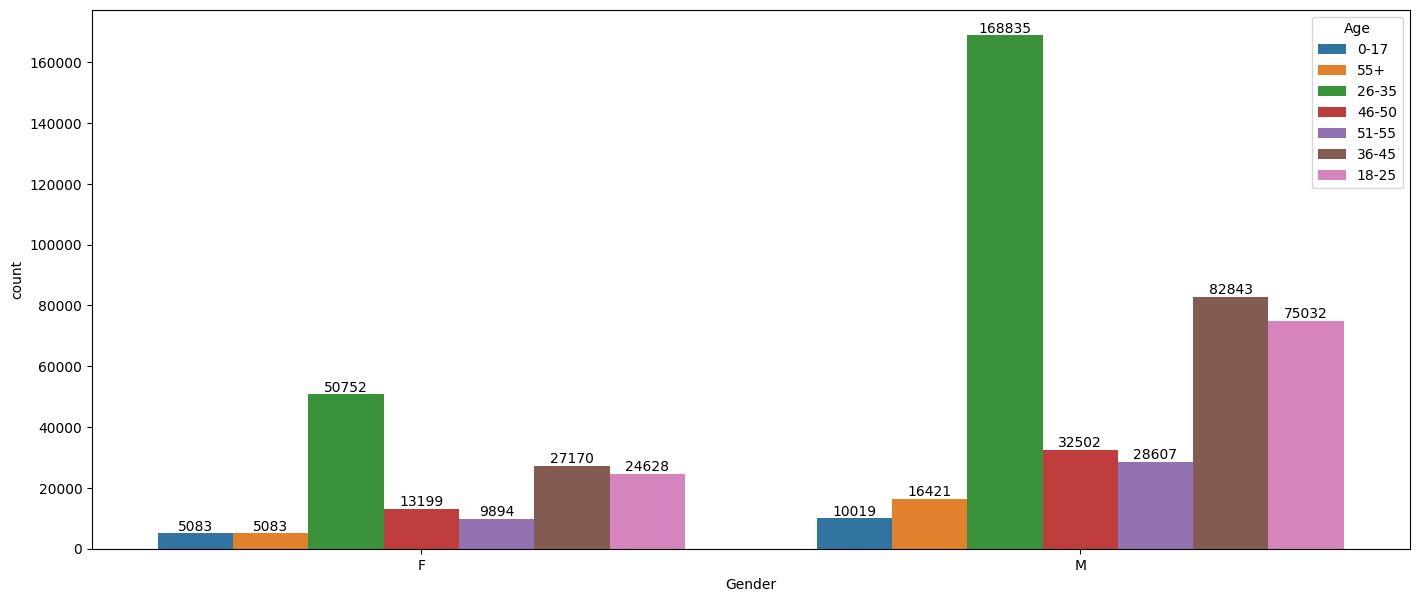

In [60]:
plt.figure(figsize = (17,7))
label = sns.countplot(data = customers, x='Gender', hue = 'Age')
for i in label.containers:
 label.bar_label(i)

Among both Male and Female customers 26 - 35 yr group are the ones making maximum number of purchases

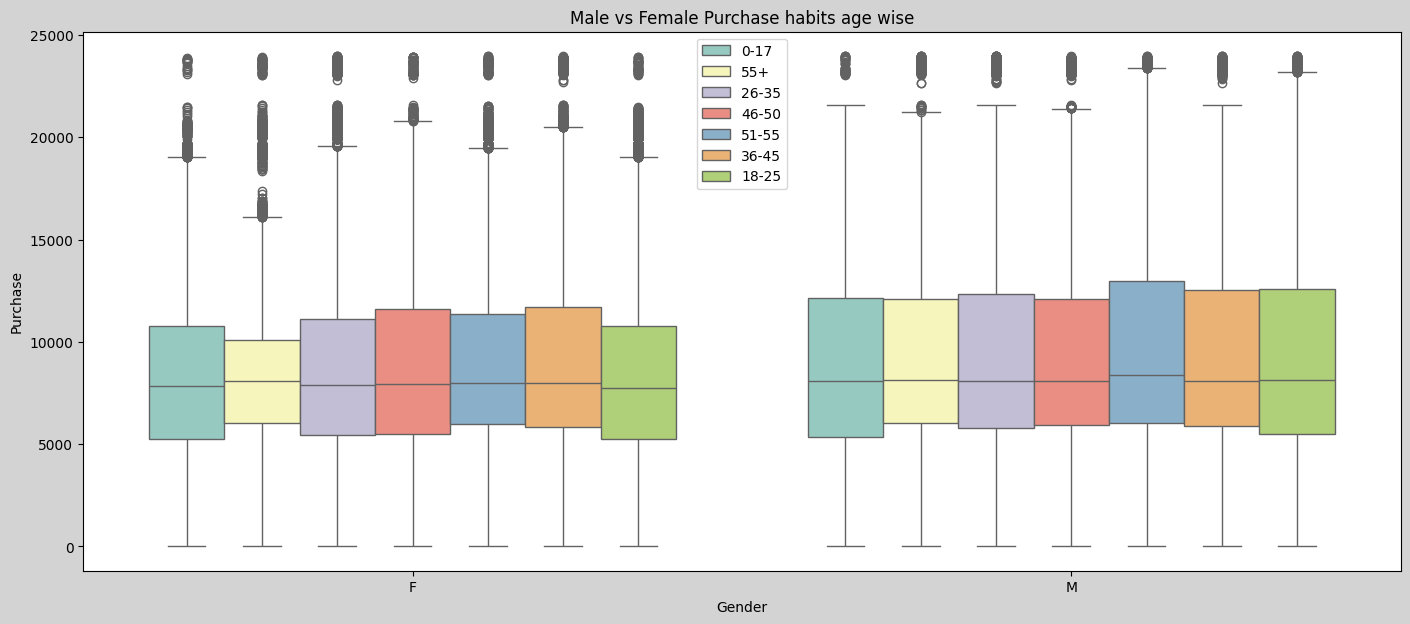

In [62]:
plt.figure(figsize = (17,7)).set_facecolor("lightgrey")
sns.boxplot(data=customers, y='Purchase', x='Gender', hue='Age',
palette='Set3')
plt.legend(loc=9)
plt.title('Male vs Female Purchase habits age wise')
plt.show()

However the median values are almost similar for male and female all the age groups

Median for 18 - 25 age female group is the least and median for 51-55 female age group is the highest

**Male vs Female purchase habits wrt City**

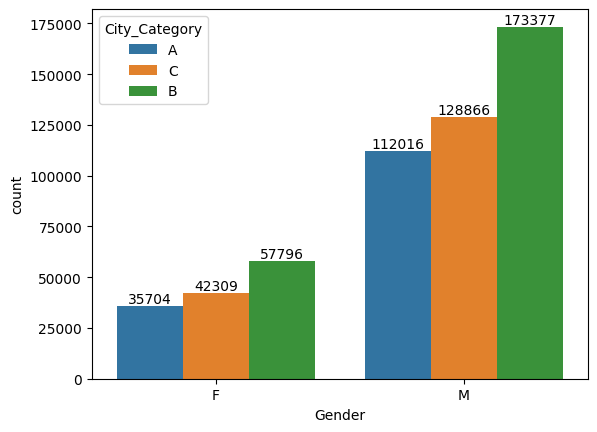

In [4]:
# sns.countplot(data = customers, x= 'Gender',
#               hue = 'City_Category')
label = sns.countplot(data = customers, x= 'Gender',
              hue = 'City_Category')
for i in label.containers:
  label.bar_label(i)

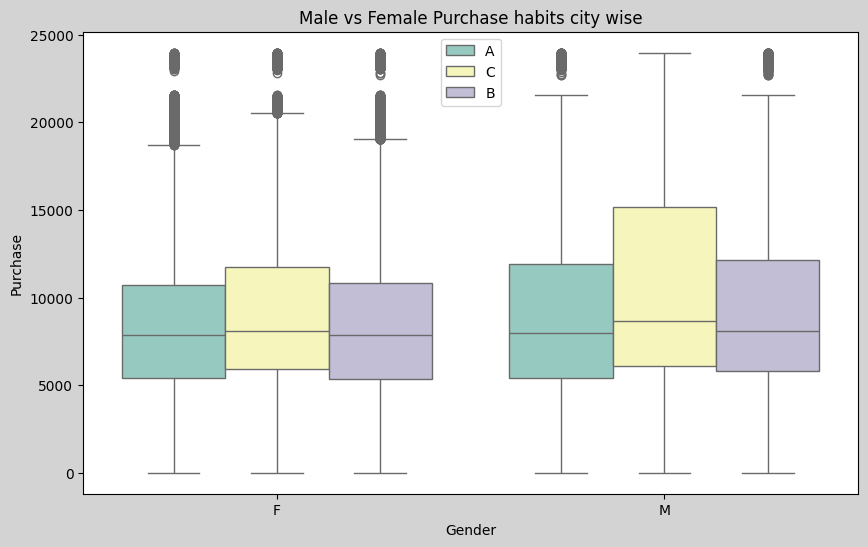

In [3]:
plt.figure(figsize = (10,6)).set_facecolor("lightgrey")
sns.boxplot(data=customers, y='Purchase', x='Gender', hue='City_Category',
palette='Set3')
plt.legend(loc=9)
plt.title('Male vs Female Purchase habits city wise')
plt.show()



In [69]:
customers.groupby(['Gender','City_Category'])['Purchase'].describe().sort_index()

count         mean          std   min     25%  \
Gender City_Category                                                     
F      A               35704.0  8579.708576  4670.230320  12.0  5413.0   
       B               57796.0  8540.677694  4682.803540  12.0  5376.0   
       C               42309.0  9130.107518  4935.788374  12.0  5919.0   
M      A              112016.0  9017.834470  4956.095263  12.0  5399.0   
       B              173377.0  9354.854433  5026.679086  12.0  5826.0   
       C              128866.0  9913.567248  5255.694667  12.0  6071.0   

                         50%       75%      max  
Gender City_Category                             
F      A              7847.0  10728.25  23948.0  
       B              7839.0  10847.00  23959.0  
       C              8077.0  11765.00  23951.0  
M      A              7963.0  11908.00  23961.0  
       B              8065.0  12134.00  23960.0  
       C              8655.0  15161.00  23961.0

Though the number of female and male purchases from city B are more, the average purchase value is more by male and female customers from city C.

Also the median value indicating the central tendencies is also higher in city C

Male vs Female purchase habits across married groups

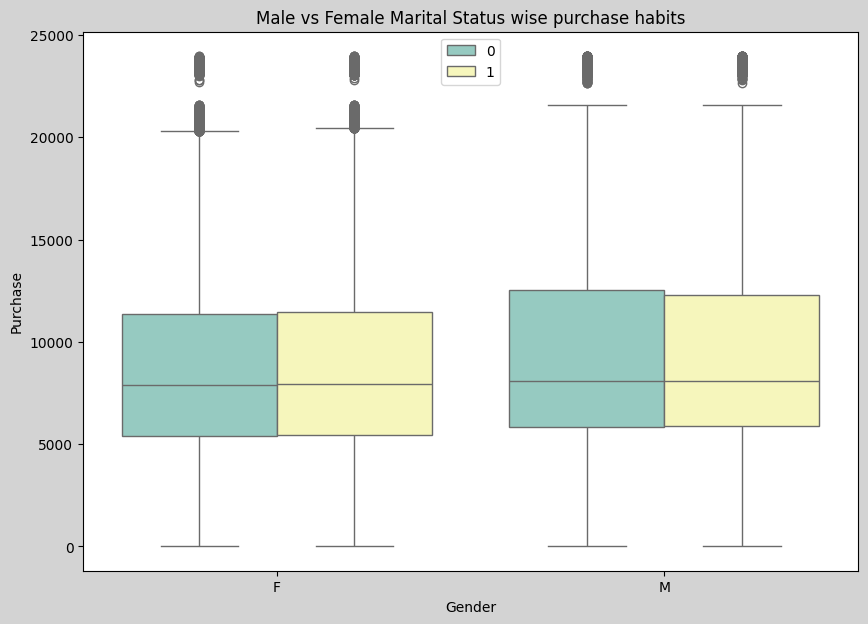

In [9]:
plt.figure(figsize = (10,7)).set_facecolor("lightgrey")
sns.boxplot(data=customers, y='Purchase', x='Gender', hue='Marital_Status',
palette='Set3')
plt.legend(loc=9)
plt.title('Male vs Female Marital Status wise purchase habits')
plt.show()

There doesnt seem much difference between maried and unmarried customer habits in both male and female groups

Male and female purchase habits wrt stay years

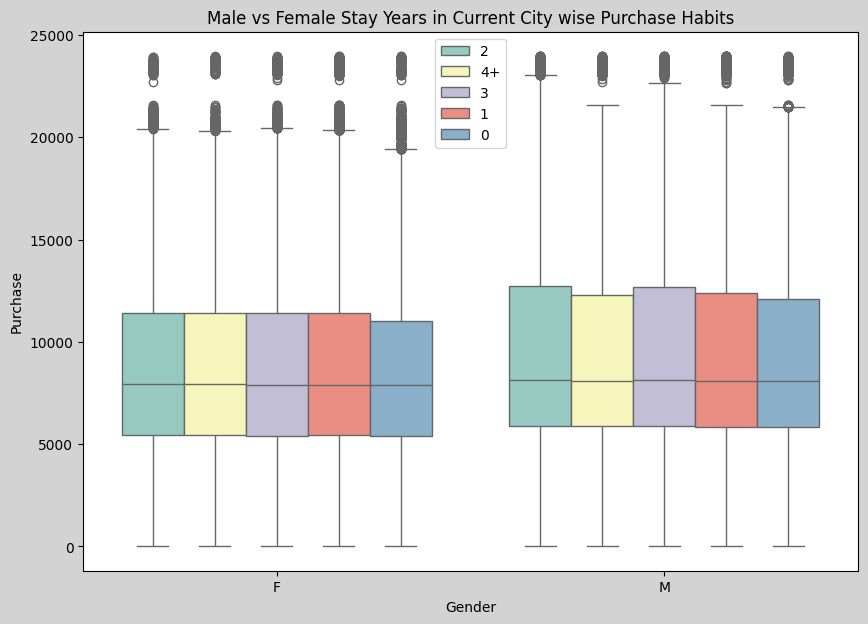

In [12]:
plt.figure(figsize = (10,7)).set_facecolor("lightgrey")
sns.boxplot(data=customers, y='Purchase', x='Gender',
hue='Stay_In_Current_City_Years', palette='Set3')
plt.legend(loc=9)
plt.title('Male vs Female Stay Years in Current City wise Purchase Habits')
plt.show()

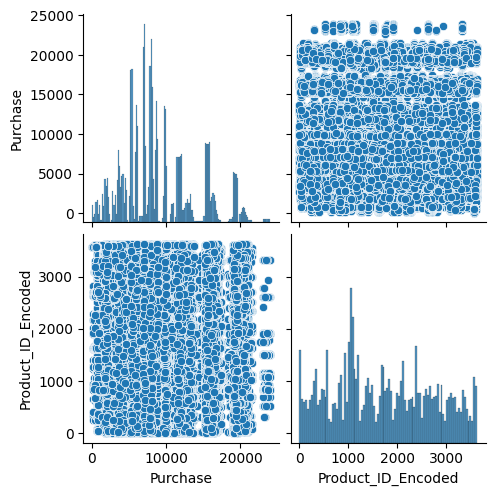

In [22]:
sns.pairplot(customers)
plt.show()

**What products are different age groups buying?**

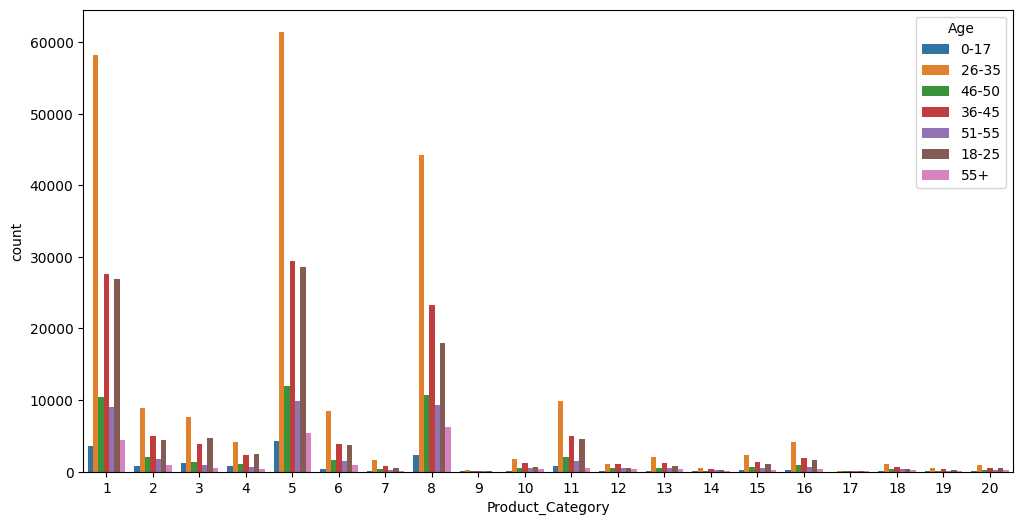

In [25]:
# plt.figure(figsize = (12,6))
# sns.countplot(data = customers, x = 'Product_Category', hue = 'Age')
# plt.show()

# Gender vs User_ID

** Number of distinct customers in each gender category**

In [ ]:
# dist_in_gender = pd.DataFrame(gender_counts.reset_index().rename(columns = {'Gender': 'Gender', 'count':'No: of unique customers'}))
# dist_in_gender['percent'] = np.round(dist_in_gender['No: of unique customers']/dist_in_gender['No: of unique customers'].sum()*100,2)
# dist_in_gender

In [ ]:
dist_in_gender = pd.DataFrame(customers.groupby(by=['Gender'])['User_ID'].nunique()).reset_index().rename(columns = {'User_ID':'No: of unique customers'})
dist_in_gender['percent'] = np.round(dist_in_gender['No: of unique customers']/dist_in_gender['No: of unique customers'].sum()*100,2)
dist_in_gender

<ipython-input-9-afb24c365cc7>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dist_in_gender = pd.DataFrame(customers.groupby(by=['Gender'])['User_ID'].nunique()).reset_index().rename(columns = {'User_ID':'No: of unique customers'})


,Gender,No: of unique customers,percent
0,F,1666,28.28
1,M,4225,71.72


** Total purchase made by each gender category **

In [ ]:
gender_revenue_df = pd.DataFrame(customers.groupby(by = ['Gender'])['Purchase'].sum()).sort_values(by = 'Purchase', ascending = False).reset_index().rename(columns = {'Purchase' : 'Total Purchase'})
gender_revenue_df['percent'] = np.round(gender_revenue_df['Total Purchase']*100/gender_revenue_df['Total Purchase'].sum(),2)
gender_revenue_df

<ipython-input-10-8989429e6fe4>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_revenue_df = pd.DataFrame(customers.groupby(by = ['Gender'])['Purchase'].sum()).sort_values(by = 'Purchase', ascending = False).reset_index().rename(columns = {'Purchase' : 'Total Purchase'})


,Gender,Total Purchase,percent
0,M,3909580100,76.72
1,F,1186232642,23.28


** Number of purchases made by each gender category **

In [ ]:
customers['Gender'].value_counts().reset_index()

,Gender,count
0,M,414259
1,F,135809


The number of distinct male customers are 4225 and the number of transactions made by them are 414259
The number of distinct female customers are 1666 and the number of transactions made by them are 135809

**Average number of transactions made by each gender group **

In [ ]:
print('Average number of transactions made by male customers = ' , round(414259/4225))
print('Average number of transactions made by female customers = ' , round(135809/1666))

Average number of transactions made by male customers =  98
Average number of transactions made by female customers =  82


** Average revenue generated from each Gender group **

In [ ]:
avgrevenue_gender_df = customers.groupby(by = ['Gender'])['Purchase'].mean().to_frame().reset_index().sort_values(by = 'Purchase', ascending = False)
avgrevenue_gender_df

<ipython-input-38-bdd0a90d25c3>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avgrevenue_gender_df = customers.groupby(by = ['Gender'])['Purchase'].mean().to_frame().reset_index().sort_values(by = 'Purchase', ascending = False)


,Gender,Purchase
1,M,9437.526040
0,F,8734.565765


** Average purchase made by each user in each gender**

In [ ]:
user_avgpurchase_gender = customers.groupby(by = ['Gender', 'User_ID'])['Purchase'].sum().to_frame().reset_index().rename(columns = {'Purchase':'Avg_purchase'})
user_avgpurchase_gender

<ipython-input-31-dd08546804bb>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  user_avgpurchase_gender = customers.groupby(by = ['Gender', 'User_ID'])['Purchase'].sum().to_frame().reset_index().rename(columns = {'Purchase':'Avg_purchase'})


,Gender,User_ID,Avg_purchase
0,F,1000001,334093
1,F,1000002,0
2,F,1000003,0
3,F,1000004,0
4,F,1000005,0
...,...,...,...
11777,M,1006036,0
11778,M,1006037,0
11779,M,1006038,0
11780,M,1006039,0


In [ ]:
user_avgpurchase_gender.groupby(by = 'Gender')['Avg_purchase'].mean()

<ipython-input-32-c029c9cc03fb>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  user_avgpurchase_gender.groupby(by = 'Gender')['Avg_purchase'].mean()


,Avg_purchase
Gender,
F,201363.544729
M,663653.047021


On an average each male makes a total purchase of 663653.047 and each female user makes a total purchase of201363.54

**Marital Status**

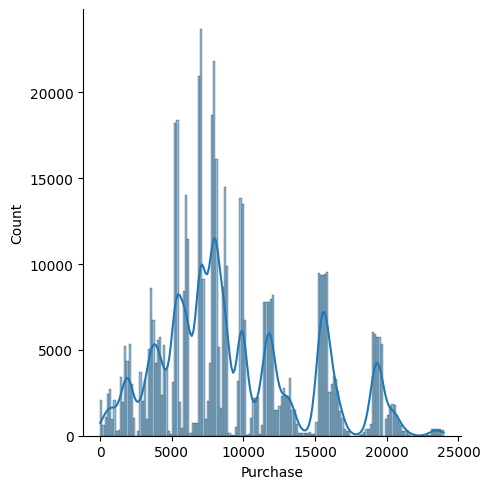

In [20]:
sns.displot(x = 'Purchase', data = customers, kde = True)

The transactions made by customers do not follow a normal distribution. Using CLT, sample data can be created to draw purchase trends of male and female customers

Average amount spend per customer for male and female

In [3]:
amt_df = customers.groupby(['User_ID','Gender'])[['Purchase']].sum()
amt_df.reset_index()
amt_df

,,Purchase
User_ID,Gender,
1000001,F,334093
1000002,M,810472
1000003,M,341635
1000004,M,206468
1000005,M,821001
...,...,...
1006036,F,4116058
1006037,F,1119538
1006038,F,90034


In [4]:
#Number of male and female transactions
customers['Gender'].value_counts()

,count
Gender,
M,414259
F,135809


Alternate for value_counts

In [17]:
# m = customers[customers['Gender']== 'M']['Purchase']
# f = customers[customers['Gender']== 'F']['Purchase']
# print(len(m),len(f))

414259 135809


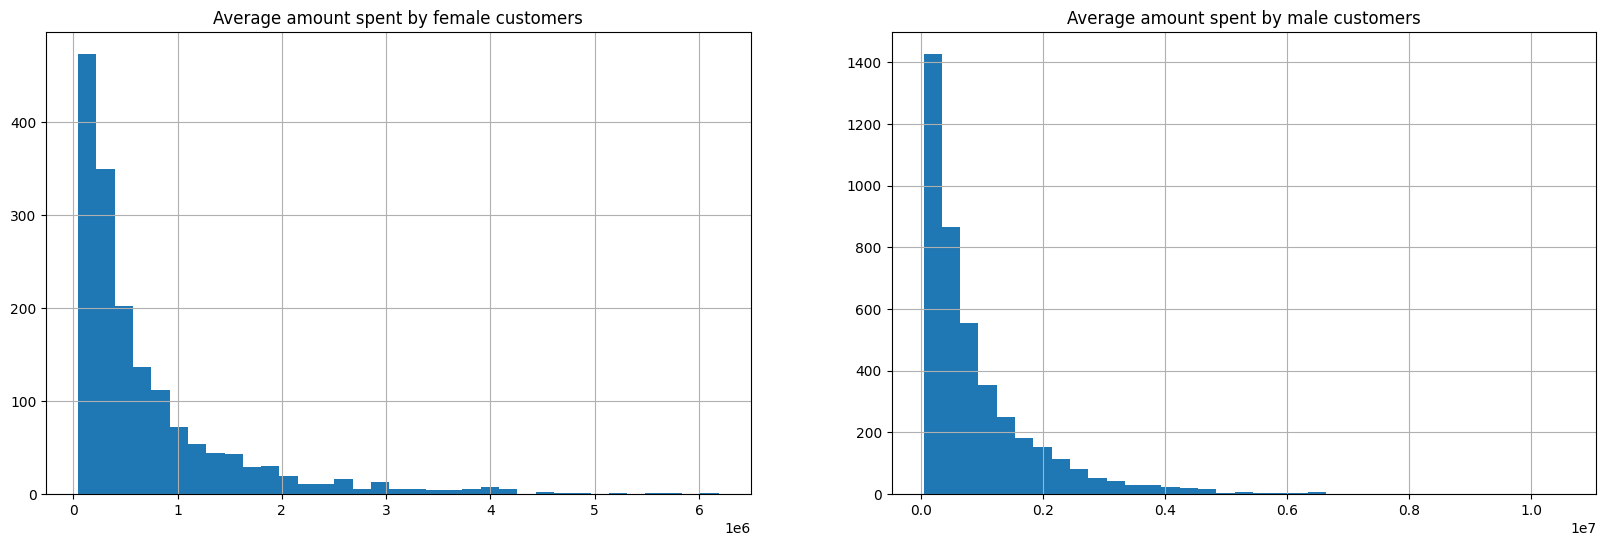

In [4]:
amt_df = customers.groupby(['User_ID','Gender'])[['Purchase']].sum()
amt_df = amt_df.reset_index()  # Reset the index to make 'Gender' a column
#Number of male and female transactions
customers['Gender'].value_counts()

#Average amount spent by each female customer - histogram
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20,6)) # Use plt.subplots() to create subplots
plt.subplot(1,2,1) # Select the first subplot
amt_df[amt_df['Gender'] == 'F']['Purchase'].hist(bins = 35)
plt.title("Average amount spent by female customers")
plt.subplot(1,2,2) # Select the second subplot
amt_df[amt_df['Gender'] == 'M']['Purchase'].hist(bins = 35)
plt.title("Average amount spent by male customers") # Change title to reflect male customers
plt.show()

# m = customers[customers['Gender']== 'M']['Purchase']
# f = customers[customers['Gender']== 'F']['Purchase']
# print(len(m),len(f))

#Average amount spent by male and female customers

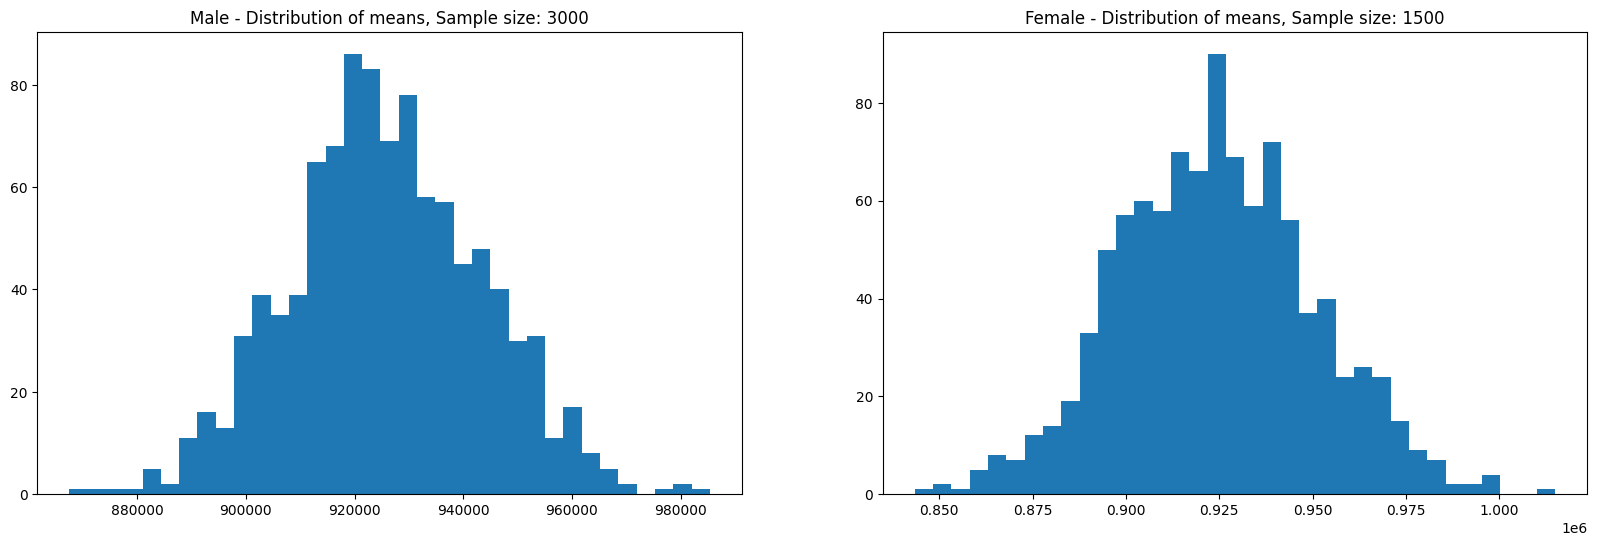

In [5]:
#make samples of female and male customers
male_df = amt_df[amt_df['Gender'] == 'M']
female_df = amt_df[amt_df['Gender'] == 'F']
male_means1 = []
female_means1 = []
num_iterations1 = 1000
male_sample_size1 = 3000
female_sample_size1 = 1500
for i in range(num_iterations1):
  male_mean1 = male_df.sample(male_sample_size1, replace = True)['Purchase'].mean()
  male_means1.append(male_mean1)
  female_mean1 = male_df.sample(female_sample_size1, replace = True)['Purchase'].mean()
  female_means1.append(female_mean1)
fig, axis = plt.subplots(nrows = 1, ncols = 2, figsize = (20,6))
axis[0].hist(male_means1, bins=35)
axis[1].hist(female_means1, bins=35)
axis[0].set_title("Male - Distribution of means, Sample size: 3000")
axis[1].set_title("Female - Distribution of means, Sample size: 1500")
plt.show()

In [6]:
print("Population mean - Mean of sample means of amount spend for Male: {:.2f}".format(np.mean(male_means1)))
print("Population mean - Mean of sample means of amount spend for Female: {:.2f}".format(np.mean(female_means1)))
Male_sample_mean1 = male_df['Purchase'].mean()
print("\nMale - Mean of the entire data: {:.2f} ".format(male_df['Purchase'].mean()))
Male_std_value1 = round(male_df['Purchase'].std(),2)
print(f'Sample STD of Male purchase : {Male_std_value1}')
Female_sample_mean1 = female_df['Purchase'].mean()
print("Female - Mean of the entire data: {:.2f} ".format(female_df['Purchase'].mean()))
Female_std_value1 = round(female_df['Purchase'].std(),2)
print(f'Sample STD of female purchase : {Female_std_value1}')


Population mean - Mean of sample means of amount spend for Male: 925792.69
Population mean - Mean of sample means of amount spend for Female: 924176.03

Male - Mean of the entire data: 925344.40 
Sample STD of Male purchase : 985830.1
Female - Mean of the entire data: 712024.39 
Sample STD of female purchase : 807370.73


#Is the above calculation sufficient to conclude that male customers spend more than female customers??

With the help of CLT, we can take samples of data and interpret the means, make inferences about the average amount spend by male and female customers using confidence interval

# Are confidence intervals of average male and female spending overlapping? How can company leverage this conclusion to make changes or improvements?

In [7]:
#sample size
sample_size = 3000
# Confidence level ( 95% confidence interval)
confidence_level = 0.95
# Calculate the margin of error using the z-distribution for male
z_critical = norm.ppf((1 + confidence_level) / 2)
male_margin_of_error_1 = z_critical * (Male_std_value1 / np.sqrt(sample_size))
# Calculate the margin of error using the z-distribution for female
z_critical = norm.ppf((1 + confidence_level) / 2)
female_margin_of_error_1 = z_critical * (Female_std_value1 / np.sqrt(sample_size))

In [70]:
# Calculate the confidence interval for male and presenting it on graph
male_ci_1 = (Male_sample_mean1 - male_margin_of_error_1, Male_sample_mean1 + male_margin_of_error_1)
print("95% Confidence Interval for male customer purchases :", male_ci_1)

95% Confidence Interval for male customer purchases : (890067.5735344619, 960621.2311992659)


In [72]:
# Calculate the confidence interval for female and presenting it on graph
female_ci_1 = (Female_sample_mean1 - female_margin_of_error_1, Female_sample_mean1 + female_margin_of_error_1)
print("95% Confidence Interval for male customer purchases :", female_ci_1)

95% Confidence Interval for male customer purchases : (683133.5353194902, 740915.2545964761)


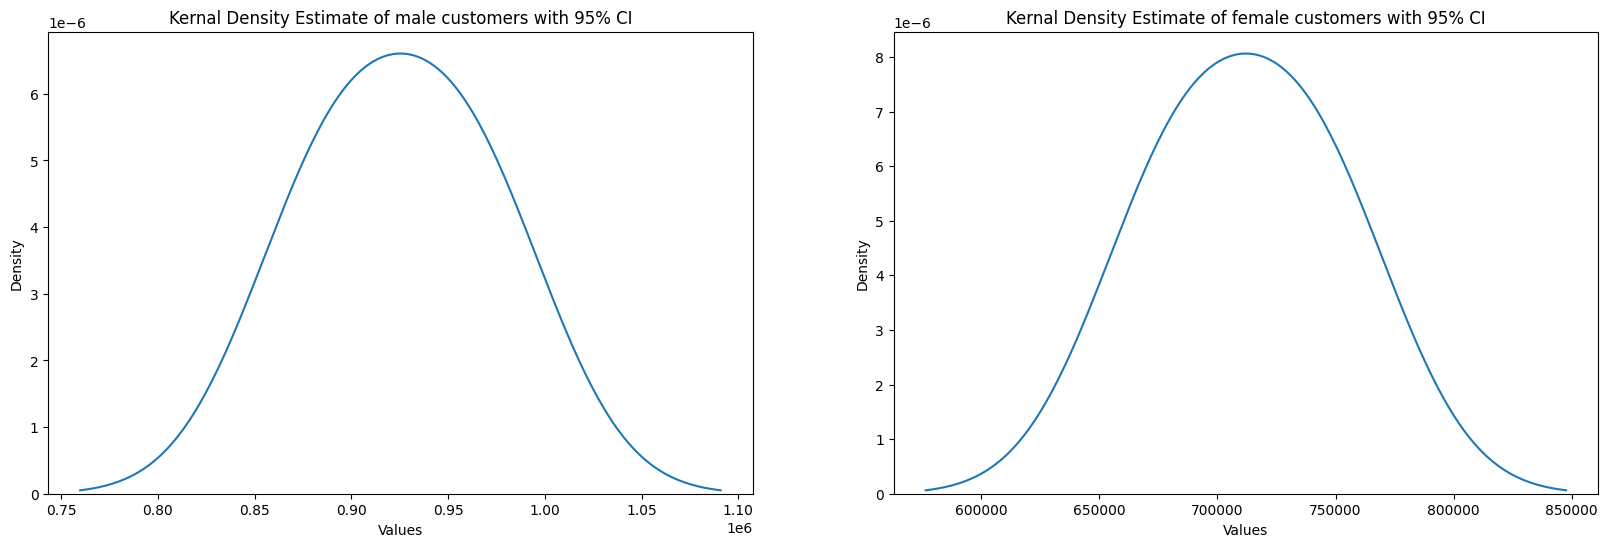

In [73]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20,6))

# Plot for male customers
plt.subplot(1,2,1)
sns.kdeplot(data = male_ci_1)
plt.title('Kernal Density Estimate of male customers with 95% CI') # Set title using plt.title()
plt.xlabel("Values")
plt.ylabel("Density")

# Plot for female customers
plt.subplot(1,2,2)
sns.kdeplot(data = female_ci_1)
plt.title('Kernal Density Estimate of female customers with 95% CI') # Set title using plt.title()
plt.xlabel("Values")
plt.ylabel("Density")
plt.show()

<Axes: ylabel='Density'>

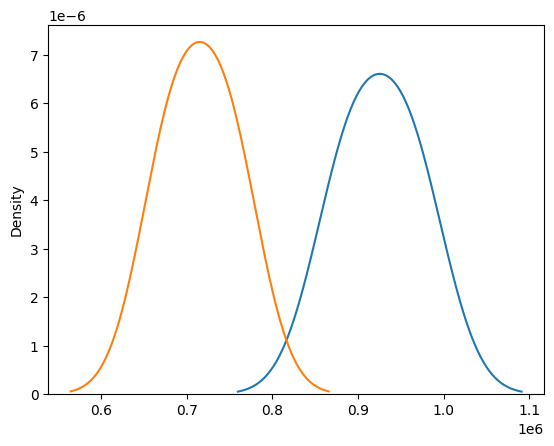

In [88]:
sns.kdeplot(male_ci_1)
sns.kdeplot(female_ci_1)

For a sample of 3000 male customers and 1500 female customers, Confidence intervals intersect. It is difficult to predict which gender makes better sales with 95% confidence.

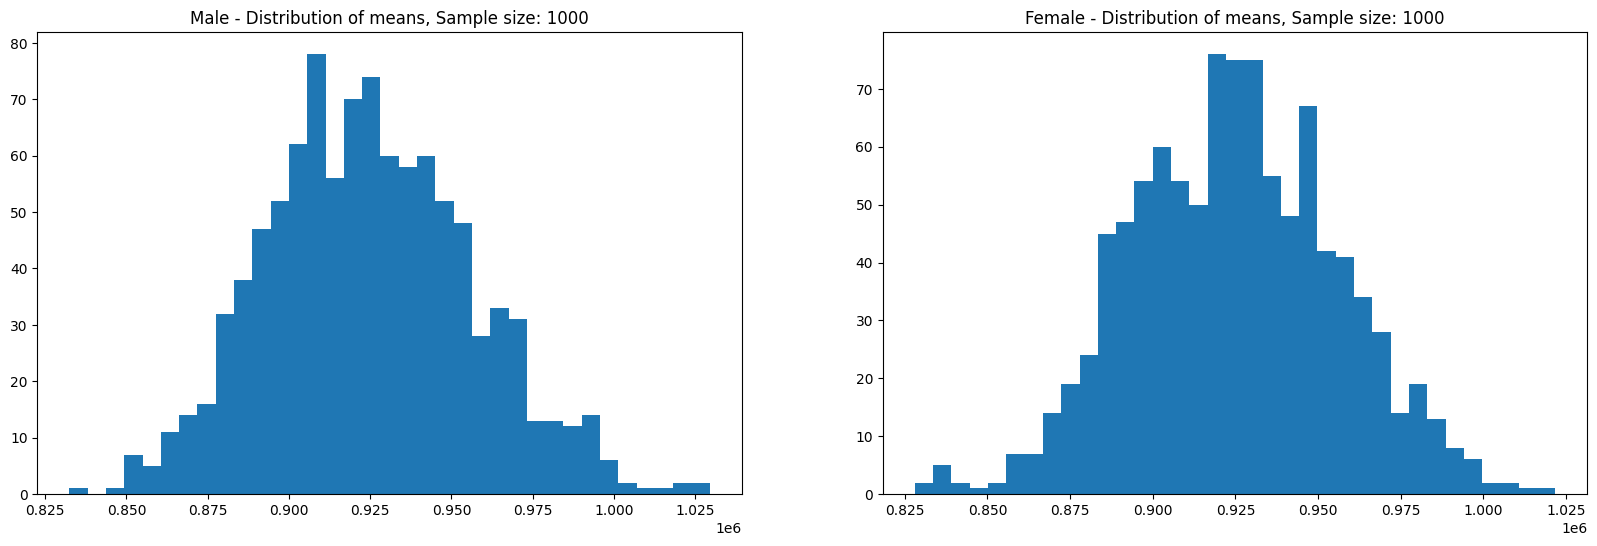

In [8]:
#make samples of female and male customers with a sample of 1000
male_df = amt_df[amt_df['Gender'] == 'M']
female_df = amt_df[amt_df['Gender'] == 'F']
male_means2 = []
female_means2 = []
num_iterations2 = 1000
male_sample_size2 = 1000
female_sample_size2 = 1000
for i in range(num_iterations2):
  male_mean2 = male_df.sample(male_sample_size2, replace = True)['Purchase'].mean()
  male_means2.append(male_mean2)
  female_mean2 = male_df.sample(female_sample_size2, replace = True)['Purchase'].mean()
  female_means2.append(female_mean2)
fig, axis = plt.subplots(nrows = 1, ncols = 2, figsize = (20,6))
axis[0].hist(male_means2, bins=35)
axis[1].hist(female_means2, bins=35)
axis[0].set_title("Male - Distribution of means, Sample size: 1000")
axis[1].set_title("Female - Distribution of means, Sample size: 1000")
plt.show()

<Axes: ylabel='Count'>

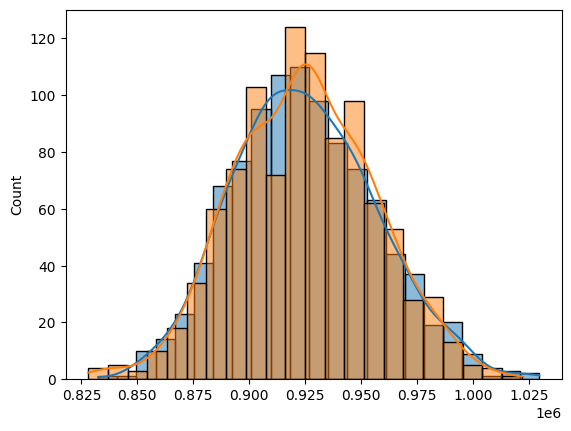

In [9]:
sns.histplot(male_means2, kde = True)
sns.histplot(female_means2, kde = True)

In [10]:
print("Population mean - Mean of sample means of amount spend for Male: {:.2f}".format(np.mean(male_means2)))
print("Population mean - Mean of sample means of amount spend for Female: {:.2f}".format(np.mean(female_means2)))
Male_sample_mean2 = male_df['Purchase'].mean()
print("\nMale - Mean of the entire data: {:.2f} ".format(male_df['Purchase'].mean()))
Male_std_value2 = round(male_df['Purchase'].std(),2)
print(f'Sample STD of Male purchase : {Male_std_value2}')
Female_sample_mean2 = female_df['Purchase'].mean()
print("Female - Mean of the entire data: {:.2f} ".format(female_df['Purchase'].mean()))
Female_std_value2 = round(female_df['Purchase'].std(),2)
print(f'Sample STD of female purchase : {Female_std_value2}')

Population mean - Mean of sample means of amount spend for Male: 924792.22
Population mean - Mean of sample means of amount spend for Female: 924576.15

Male - Mean of the entire data: 925344.40 
Sample STD of Male purchase : 985830.1
Female - Mean of the entire data: 712024.39 
Sample STD of female purchase : 807370.73


In [11]:
#sample size
sample_size = 1000
# Confidence level ( 95% confidence interval)
confidence_level = 0.95
# Calculate the margin of error using the z-distribution for male
z_critical = norm.ppf((1 + confidence_level) / 2)
male_margin_of_error_2 = z_critical * (Male_std_value2 / np.sqrt(sample_size))
# Calculate the margin of error using the z-distribution for female
z_critical = norm.ppf((1 + confidence_level) / 2)
female_margin_of_error_2 = z_critical * (Female_std_value2 / np.sqrt(sample_size))

In [12]:
# Calculate the confidence interval for male and presenting it on graph
male_ci_2 = (Male_sample_mean2 - male_margin_of_error_2, Male_sample_mean2 + male_margin_of_error_2)
print("95% Confidence Interval for male customer purchases :", male_ci_2)

95% Confidence Interval for male customer purchases : (864243.142499233, 986445.6622344948)


In [13]:
# Calculate the confidence interval for male and presenting it on graph
female_ci_2 = (Female_sample_mean2 - female_margin_of_error_2, Female_sample_mean2 + male_margin_of_error_2)
print("95% Confidence Interval for male customer purchases :", female_ci_2)

95% Confidence Interval for male customer purchases : (661983.9581897724, 773125.6548256141)


<Axes: ylabel='Density'>

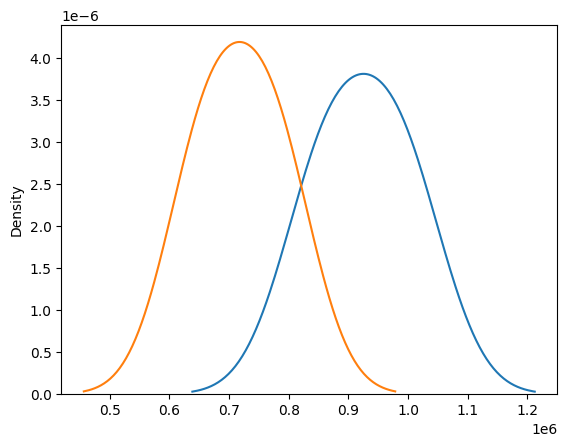

In [19]:
sns.kdeplot(male_ci_2)
sns.kdeplot(female_ci_2)

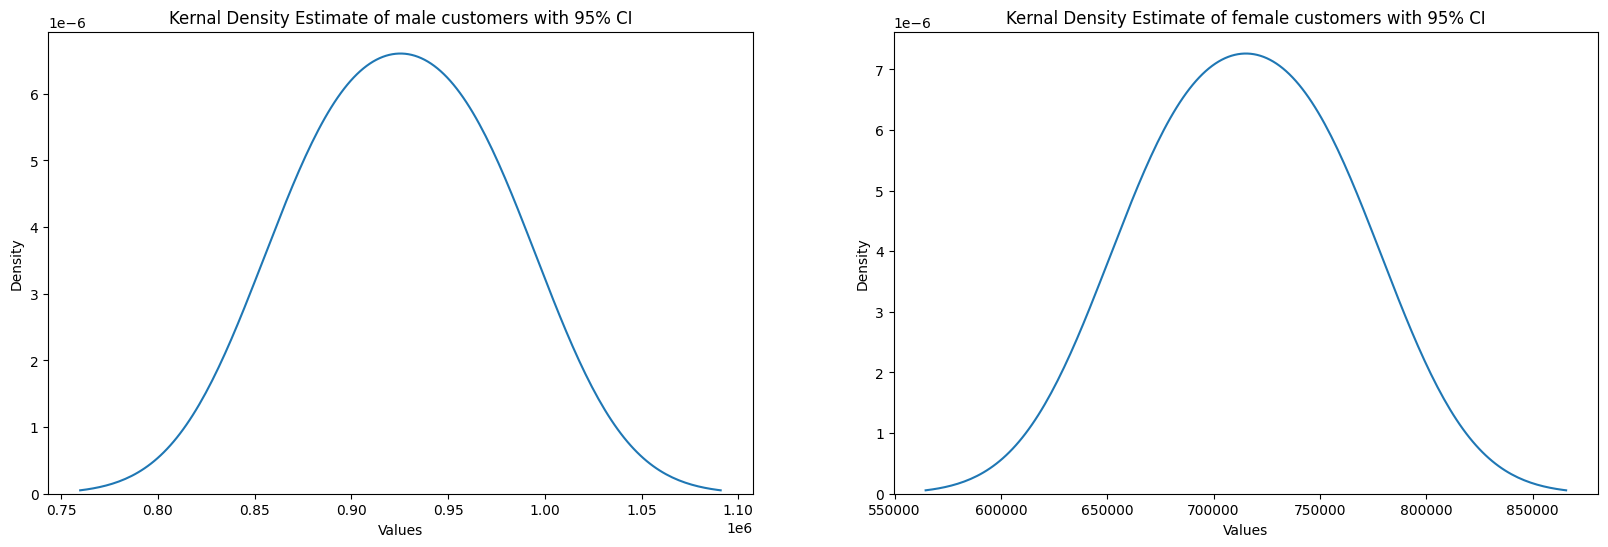

In [82]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20,6))

# Plot for male customers
plt.subplot(1,2,1)
sns.kdeplot(data = male_ci_2)
plt.title('Kernal Density Estimate of male customers with 95% CI') # Set title using plt.title()
plt.xlabel("Values")
plt.ylabel("Density")

# Plot for female customers
plt.subplot(1,2,2)
sns.kdeplot(data = female_ci_2)
plt.title('Kernal Density Estimate of female customers with 95% CI') # Set title using plt.title()
plt.xlabel("Values")
plt.ylabel("Density")
plt.show()

Though the kde plots intersect while their confidence intervals do not overlap is because of some overlap in the distribution of datapoints.
The central tendency of two distributions is significantly different.

**Intersection of KDE Plots:** Suggests that some values are common in both distributions, which is normal, especially if the datasets have overlapping ranges.

**Non-overlapping Confidence Intervals:** Suggests that the mean of purchases are statistically different, despite some shared values.


**Lets plot the mean of 1000 Random Samples of sizes 10,100,1000,10000 and 100000 with 90%**
**Confidence Interval **

In [16]:
def bootstrap(sample1,sample2,sample_size,itr_size=1000,ci=90):
 ci = ci/100

 plt.figure(figsize=(16,8))
 sample1_n = [np.mean(sample1.sample(sample_size)) for i in
range(itr_size)]
 sample2_n = [np.mean(sample2.sample(sample_size)) for i in
range(itr_size)]


# Insight

1) With reference to the above data, at a 95% confidence interval:

   a) The average amount spent by male customers will lie between 896453.54 and 954235.25.

   b) The average amount spent by female customers will lie between 683133.53 and 740915.24.

2) Confidence intervals for average male and female spending are not overlapping.

3) Comparitively female customers spend more than the male customers

4) With respect to the above data, company should target more male customers, as they spend a lot compared to females.

5)

# Marital Status and Purchase

In [4]:
maritalstatus_df = customers.groupby(['User_ID', 'Marital_Status'])[['Purchase']].sum()
maritalstatus_df = maritalstatus_df.reset_index() # Assign the result back to maritalstatus_df
maritalstatus_df['Marital_Status'].value_counts()

,count
Marital_Status,
0,3417
1,2474


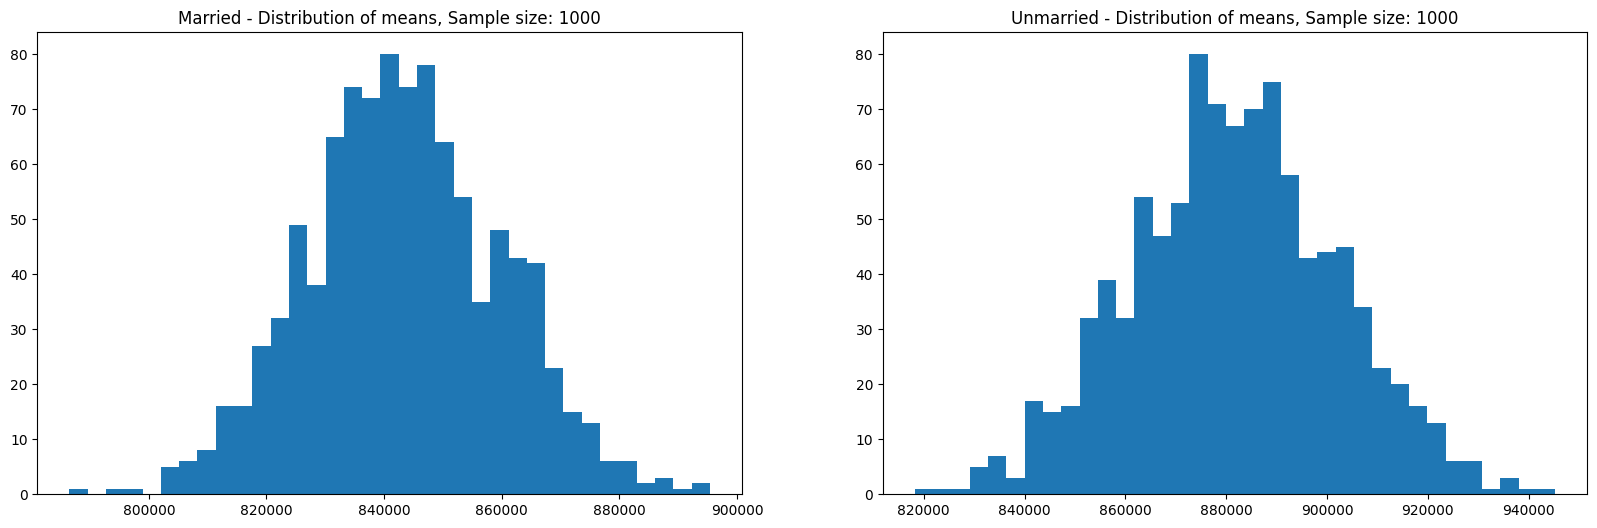

In [5]:
#make samples of married and unmarried customers with a sample of 1000
married_df = maritalstatus_df[maritalstatus_df['Marital_Status'] == 1]
unmarried_df = maritalstatus_df[maritalstatus_df['Marital_Status'] == 0]
married_means = []
unmarried_means = []
ms_iterations = 1000
married_sample_size = 3000
unmarried_sample_size = 2000
for i in range(ms_iterations):
  married_mean = married_df.sample(married_sample_size, replace = True)['Purchase'].mean()
  married_means.append(married_mean)
  unmarried_mean = unmarried_df.sample(unmarried_sample_size, replace = True)['Purchase'].mean()
  unmarried_means.append(unmarried_mean)
fig, axis = plt.subplots(nrows = 1, ncols = 2, figsize = (20,6))
axis[0].hist(married_means, bins=35)
axis[1].hist(unmarried_means, bins=35)
axis[0].set_title("Married - Distribution of means, Sample size: 1000")
axis[1].set_title("Unmarried - Distribution of means, Sample size: 1000")
plt.show()

In [6]:
print("Population mean - Mean of sample means of amount spend by Married : {:.2f}".format(np.mean(married_means)))
print("Population mean - Mean of sample means of amount spend for Unmarried : {:.2f}".format(np.mean(unmarried_means)))
married_sample_mean = married_df['Purchase'].mean()
print("\nMarried - Mean of the entire data: {:.2f} ".format(married_df['Purchase'].mean()))
Married_std_value = round(married_df['Purchase'].std(),2)
print(f'Sample STD of Married purchase : {Married_std_value}')
unmarried_sample_mean = unmarried_df['Purchase'].mean()
print("Female - Mean of the entire data: ", round(unmarried_sample_mean,2))
unmarried_std_value = round(unmarried_df['Purchase'].std(),2)
print(f'Sample STD of unmarried purchase : {unmarried_std_value}')

Population mean - Mean of sample means of amount spend by Married : 843400.61
Population mean - Mean of sample means of amount spend for Unmarried : 881419.90

Married - Mean of the entire data: 843526.80 
Sample STD of Married purchase : 935352.12
Female - Mean of the entire data:  880575.78
Sample STD of unmarried purchase : 949436.25


In [7]:
#sample size
sample_size = 1000
# Confidence level ( 95% confidence interval)
confidence_level = 0.95
# Calculate the margin of error using the z-distribution for married
z_critical = norm.ppf((1 + confidence_level) / 2)
married_margin_of_error = z_critical * (Married_std_value / np.sqrt(sample_size))
# Calculate the margin of error using the z-distribution for unmarried
z_critical = norm.ppf((1 + confidence_level) / 2)
unmarried_margin_of_error = z_critical * (unmarried_std_value / np.sqrt(sample_size))

In [8]:
# Calculate the confidence interval for married and presenting it on graph
married_ci = (married_sample_mean - married_margin_of_error, married_sample_mean + married_margin_of_error)
print("95% Confidence Interval for married customer purchases :", married_ci)

95% Confidence Interval for married customer purchases : (785554.1369423755, 901499.4564286836)


In [9]:
# Calculate the confidence interval for married and presenting it on graph
unmarried_ci = (unmarried_sample_mean - unmarried_margin_of_error, unmarried_sample_mean + unmarried_margin_of_error)
print("95% Confidence Interval for married customer purchases :", unmarried_ci)

95% Confidence Interval for married customer purchases : (821730.1948485033, 939421.3690964776)


90% confidence Interval

In [10]:
#sample size
sample_size = 1000
# Confidence level ( 90% confidence interval)
confidence_level = 0.9
# Calculate the margin of error using the z-distribution for married
z_critical = norm.ppf((1 + confidence_level) / 2)
married_margin_of_error = z_critical * (Married_std_value / np.sqrt(sample_size))
# Calculate the margin of error using the z-distribution for unmarried
z_critical = norm.ppf((1 + confidence_level) / 2)
unmarried_margin_of_error = z_critical * (unmarried_std_value / np.sqrt(sample_size))

In [12]:
# Calculate the confidence interval for married and presenting it on graph
married_ci = (married_sample_mean - married_margin_of_error, married_sample_mean + married_margin_of_error)
print("90% Confidence Interval for married customer purchases :", married_ci)

90% Confidence Interval for married customer purchases : (794874.606954131, 892178.986416928)


In [13]:
# Calculate the confidence interval for married and presenting it on graph
unmarried_ci = (unmarried_sample_mean - unmarried_margin_of_error, unmarried_sample_mean + unmarried_margin_of_error)
print("90% Confidence Interval for married customer purchases :", unmarried_ci)

90% Confidence Interval for married customer purchases : (831191.0084896791, 929960.5554553019)


In [24]:
df_male = customers[customers['Gender']=='M']
df_female = customers[customers['Gender']=='F']

<Figure size 1200x800 with 0 Axes>

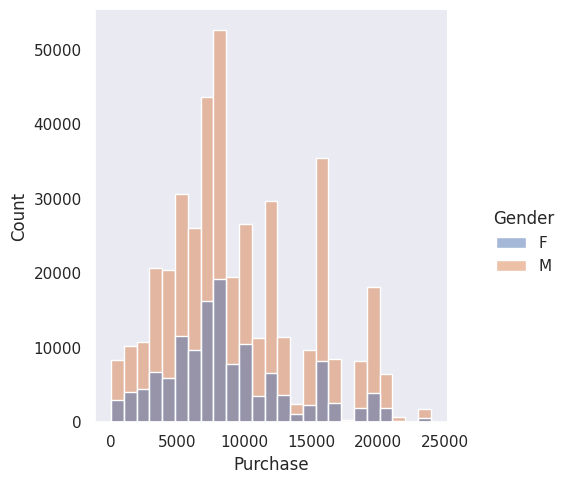

In [26]:
plt.figure(figsize=(12,8))
sns.set(style='dark')
sns.displot(x= 'Purchase',data=customers,hue='Gender',bins=25)
plt.show()


**Insights:**

As the confidence interval of married and unmarried people intersect, there isn't strong evidence to claim that the parameter of interest (e.g., mean purchase, mean satisfaction score) differs significantly between the two groups, based on the data and the confidence level chosen.

If still investigating potential differences is needed, hypothesis test (like a t-test for comparing means) to formally assess whether the difference between the groups is statistically significant can be performed or consider collecting more data to reduce the width of the confidence intervals, which might give a clearer picture of any potential differences can be done.



# Age Category and Purchase

In [14]:
age_df = customers.groupby(['User_ID', 'Age'])[['Purchase']].sum()
age_df = age_df.reset_index()
age_df

,User_ID,Age,Purchase
0,1000001,0-17,334093
1,1000002,55+,810472
2,1000003,26-35,341635
3,1000004,46-50,206468
4,1000005,26-35,821001
...,...,...,...
5886,1006036,26-35,4116058
5887,1006037,46-50,1119538
5888,1006038,55+,90034
5889,1006039,46-50,590319


In [15]:
age_df['Age'].value_counts()

,count
Age,
26-35,2053
36-45,1167
18-25,1069
46-50,531
51-55,481
55+,372
0-17,218


In [21]:
def calculate_age_group_means_and_confidence_intervals(customers):
    sum_by_age = customers.groupby(['User_ID', 'Age'])['Purchase'].sum().reset_index()
    sum_by_age = sum_by_age.sort_values(by='User_ID', ascending=False)
    # Create dict and filtering data age group wise
    age_groups = {
        'Age_0_17': sum_by_age[sum_by_age['Age'] == '0-17'],
        'Age_18_25': sum_by_age[sum_by_age['Age'] == '18-25'],
        'Age_26_35': sum_by_age[sum_by_age['Age'] == '26-35'],
        'Age_36_45': sum_by_age[sum_by_age['Age'] == '36-45'],
        'Age_46_50': sum_by_age[sum_by_age['Age'] == '46-50'],
        'Age_51_55': sum_by_age[sum_by_age['Age'] == '51-55'],
        'Age_55+': sum_by_age[sum_by_age['Age'] == '55+']
    }
    # Define sample sizes and number of repetitions
    sample_sizes = {
        'Age_0_17': 200,
        'Age_18_25': 1000,
        'Age_26_35': 2000,
        'Age_36_45': 1000,
        'Age_46_50': 500,
        'Age_51_55': 400,
        'Age_55+': 300
    }
    num_repitions = 1000
    # Create a dictionary to store results
    results = {}
    # Perform random sampling and calculate means for each age group
    for age_group, age_df in age_groups.items():
        sample_size = sample_sizes.get(age_group, 0)
        sample_means = []
        for _ in range(num_repitions):
            random_sample = age_df.sample(n=sample_size)
            sample_mean = random_sample['Purchase'].mean()
            sample_means.append(sample_mean)
        # Calculate the population mean, sample mean, and standard deviation
        population_mean = age_df['Purchase'].mean()
        sample_mean_mean = sum(sample_means) / len(sample_means)
        sample_mean_std = pd.Series(sample_means).std()
        # Calculate the confidence interval using the z-distribution
        confidence_level = 0.95  # 95% confidence interval
        z_critical = norm.ppf((1 + confidence_level) / 2)  # Z-score for the desired confidence level
        margin_of_error = z_critical * (age_df['Purchase'].std() / np.sqrt(sample_size))
        lower_bound = sample_mean_mean - margin_of_error
        upper_bound = sample_mean_mean + margin_of_error
        results[age_group] = {
            'Population Mean': population_mean,
            'Sample Mean Mean': sample_mean_mean,
            'Sample Mean Std': sample_mean_std,
            'Confidence Interval': (lower_bound, upper_bound)
        }
    return results
results = calculate_age_group_means_and_confidence_intervals(customers)
for age_group, metrics in results.items():
    print(f'{age_group} average spent value, random mean value, std value and Confidence Interval:')
    print(f'{age_group} customer average spent amount: {metrics["Population Mean"]}')
    print(f'Random Sample Mean : {metrics["Sample Mean Mean"]}')
    print(f'Sample Mean Std: {metrics["Sample Mean Std"]}')
    print(f'Confidence Interval: {metrics["Confidence Interval"]}')
    print()

Age_0_17 average spent value, random mean value, std value and Confidence Interval:
Age_0_17 customer average spent amount: 618867.8119266055
Random Sample Mean : 619279.2551000004
Sample Mean Std: 13903.731374461988
Confidence Interval: (524059.8184443962, 714498.6917556046)

Age_18_25 average spent value, random mean value, std value and Confidence Interval:
Age_18_25 customer average spent amount: 854863.119738073
Random Sample Mean : 854690.3252029998
Sample Mean Std: 7036.217258956524
Confidence Interval: (799655.17582946, 909725.4745765395)

Age_26_35 average spent value, random mean value, std value and Confidence Interval:
Age_26_35 customer average spent amount: 989659.3170969313
Random Sample Mean : 989578.0097109984
Sample Mean Std: 3817.4664614059207
Confidence Interval: (944366.533381075, 1034789.4860409218)

Age_36_45 average spent value, random mean value, std value and Confidence Interval:
Age_36_45 customer average spent amount: 879665.7103684661
Random Sample Mean : 8

# Insight
1) With reference to the above data, at a 95% confidence interval:
   a) The highest average amount spent by 26- to 35-year-old customers will lie between 944419.9990 and 1034842.9516.

   b) The average amount spent by 36- to 45-year-old customers will lie between 819003.0902 and 940678.8198.

   c) The average amount spent by 18- to 25-year-old customers will lie between 799594.4375 and 909664.7362.

   d) The average amount spent by 46- to 50-year-old customers will lie between 711215.1004 and 874125.3830.

   e) The average amount spent by 51- to 55-year-old customers will lie between 685670.0292 and 840962.3353.

   f) The average amount spent by 55+ age group customers will lie between 470454.5225 and 610200.5797.

   g) The lowest average amount spent by 0 to 17-year-old customers will lie between 524534.4423 and 714973.3156.

2) From the above data, it is clear that the age group 26 to 35 spends more compared to other age categories.

3) Age groups above 55 and below 0 to 17 spend very little compared to others.

4) Confidence intervals for average 26- to 35-year-old and 36- to 45-year-old spending are not overlapping.

5) With respect to the above data, the company should target the age category between 26 and 35, as they spend more money          compared to others.

# Recommendations:

1) Men spend more money than women, so the company should focus on retaining male customers and getting more male customers.

2) Product Category: 5, 1, and 8 have the highest purchasing frequency.
   It means the products in these categories are liked more by customers.
   The company can focus on selling more of these products.

3) Product Category: 11, 2, and 6, 3 have almost close competition in purchasing.

   The company can focus on selling more of these products.

4) Unmarried customers spend more money compared to married customers. So the company should focus on retaining the unmarried customers and getting more unmarried customers.

5) 86% of purchases are done by customers whose ages are between 18 and 45. So the company should focus on the acquisition of customers who are aged 18–45.

6) Customers living in City_Category C spend more money than other customers living in B or A. Selling more products in City Category C will help the company increase sales.

7) Management should come-up with some games in the mall to attract more younger
generation will can help them to increase the sale.

8) In order to attract more young shoppers, they can offer some games for the younger generation